In [551]:
#İmport all required libaries first.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from bs4 import BeautifulSoup
import requests

from random import randint
from time import sleep
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV


In [561]:
url_stats = 'https://fbref.com/en/comps/Big5/2019-2020/stats/players/2019-2020-Big-5-European-Leagues-Stats'
url_mics  = 'https://fbref.com/en/comps/Big5/2019-2020/misc/players/2019-2020-Big-5-European-Leagues-Stats' 
url_shoot = 'https://fbref.com/en/comps/Big5/2019-2020/shooting/players/2019-2020-Big-5-European-Leagues-Stats'
url_pass  = 'https://fbref.com/en/comps/Big5/2019-2020/passing/players/2019-2020-Big-5-European-Leagues-Stats'
url_def = 'https://fbref.com/en/comps/Big5/2019-2020/defense/players/2019-2020-Big-5-European-Leagues-Stats'
url_crea = 'https://fbref.com/en/comps/Big5/2019-2020/gca/players/2019-2020-Big-5-European-Leagues-Stats'

In [562]:
response = requests.get(url_stats)

In [563]:
response.status_code

200

In [479]:
#bunlara bu sayfa için gerek kalmadı
'''headers = {'Accept-Language': 'en-gb'}
response = requests.get(url_s, headers=headers)
response.status_code'''

"headers = {'Accept-Language': 'en-gb'}\nresponse = requests.get(url_s, headers=headers)\nresponse.status_code"

In [480]:
'''from fake_useragent import UserAgent
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
response = requests.get(url_s, headers=headers)
response.status_code'''

"from fake_useragent import UserAgent\nheaders = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}\nresponse = requests.get(url_s, headers=headers)\nresponse.status_code"

In [564]:
soup = BeautifulSoup(response.text,"html.parser")

In [565]:
table = soup.find('table') 

In [570]:
headers_stats = [ 'Player','Nation','Pos','Squad','Comp','Age','Born','MP','Starts','Min','Gls','Ast','PK','PKatt','CrdY','CrdR','Gls','Ast','G+A','G-PK','G+A-PK','xG','npxG','xA','xG','xA','xG+xA','npxG','npxG+xA','Matches']
df_stats = pd.DataFrame(columns=headers_stats)
i=0
for j in table.find_all('tr')[1:]:
    row_data = j.find_all('td')
    row = [tr.text for tr in row_data]
    if row != []:
        df_stats.loc[i] = row
        i=i+1
df_stats

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [485]:
df_stats=df_stats.loc[:,['Player','Squad','Pos','Comp','Age','Min','Gls','Ast','G+A']]
df_stats = df_stats.rename({'Pos': 'Position', 'Gls': 'Goals', 'Ast':'Asists','G+A':'GoalAstPer90'}, axis=1)
df_stats

,Player,Squad,Position,Comp,Age,Min,Goals,Goals,Asists,Asists,GoalAstPer90
0,Patrick van Aanholt,Crystal Palace,DF,eng Premier League,28,"2,507",3,0.11,2,0.07,0.18
1,Max Aarons,Norwich City,DF,eng Premier League,19,"3,240",0,0.00,1,0.03,0.03
2,Yunis Abdelhamid,Reims,DF,fr Ligue 1,31,"2,520",3,0.11,0,0.00,0.11
3,Suleiman Abdullahi,Union Berlin,"FW,MF",de Bundesliga,22,157,1,0.57,0,0.00,0.57
4,Mehdi Abeid,Nantes,MF,fr Ligue 1,26,"1,817",1,0.05,2,0.10,0.15
...,...,...,...,...,...,...,...,...,...,...,...
2727,Bongani Zungu,Amiens,MF,fr Ligue 1,26,992,1,0.09,0,0.00,0.09
2728,Szymon Żurkowski,Fiorentina,MF,it Serie A,21,12,0,0.00,0,0.00,0.00
2729,David Zurutuza,Real Sociedad,MF,es La Liga,33,157,0,0.00,0,0.00,0.00
2730,Martin Ødegaard,Real Sociedad,MF,es La Liga,20,"2,527",4,0.14,6,0.21,0.36


In [486]:
df_stats[df_stats['Player']== 'Adama Traoré']

,Player,Squad,Position,Comp,Age,Min,Goals,Goals,Asists,Asists,GoalAstPer90
2521,Adama Traoré,Metz,"FW,MF",fr Ligue 1,24,"1,007",1,0.09,4,0.36,0.45
2522,Adama Traoré,Monaco,MF,fr Ligue 1,24,25,0,0.00,0,0.00,0.00
2523,Adama Traoré,Wolves,"FW,MF",eng Premier League,23,"2,605",4,0.14,9,0.31,0.45


In [571]:
url_mics  = 'https://fbref.com/en/comps/Big5/2019-2020/misc/players/2019-2020-Big-5-European-Leagues-Stats' 
response = requests.get(url_mics)
soup = BeautifulSoup(response.text,"html.parser")
table = soup.find('table') 
headers = [ 'Player','Nation','Pos','Squad','Comp','Age','Born','90s','CrdY','CrdR','2CrdY','Fls','Fld','Off','Crs','Int','TklW','PKwon','PKcon','OG','Recov','Won','Lost','Won%','Matches']
df_misc = pd.DataFrame(columns=headers)
i=0
for j in table.find_all('tr')[1:]:
    row_data = j.find_all('td')
    row = [tr.text for tr in row_data]
    if row != []:
        df_misc.loc[i] = row
        i=i+1
df_misc


,Player,Nation,Pos,Squad,Comp,Age,Born,90s,CrdY,CrdR,2CrdY,Fls,Fld,Off,Crs,Int,TklW,PKwon,PKcon,OG,Recov,Won,Lost,Won%,Matches
0,Patrick van Aanholt,nl NED,DF,Crystal Palace,eng Premier League,28,1990,27.9,0,0,0,9,8,2,44,23,32,0,0,1,243,12,17,41.4,Matches
1,Max Aarons,eng ENG,DF,Norwich City,eng Premier League,19,2000,36.0,7,0,0,29,49,3,54,20,36,1,0,0,281,23,42,35.4,Matches
2,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,31,1987,28.0,0,0,0,21,20,0,1,24,37,0,1,0,226,86,42,67.2,Matches
3,Suleiman Abdullahi,ng NGA,"FW,MF",Union Berlin,de Bundesliga,22,1996,1.7,1,0,0,0,0,3,7,1,1,0,0,0,15,6,11,35.3,Matches
4,Mehdi Abeid,dz ALG,MF,Nantes,fr Ligue 1,26,1992,20.2,5,0,0,55,43,1,18,17,41,0,1,0,194,14,19,42.4,Matches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2727,Bongani Zungu,za RSA,MF,Amiens,fr Ligue 1,26,1992,11.0,4,0,0,24,15,1,3,18,12,0,0,0,133,18,25,41.9,Matches
2728,Szymon Żurkowski,pl POL,MF,Fiorentina,it Serie A,21,1997,0.1,0,0,0,1,0,0,0,0,0,0,0,0,2,1,0,100.0,Matches
2729,David Zurutuza,es ESP,MF,Real Sociedad,es La Liga,33,1986,1.7,0,0,0,3,3,0,2,2,1,0,0,0,14,7,8,46.7,Matches
2730,Martin Ødegaard,no NOR,MF,Real Sociedad,es La Liga,20,1998,28.1,3,0,0,24,37,0,38,15,18,0,0,0,231,11,20,35.5,Matches


In [488]:
df_misc = df_misc.loc[:,['Player','Squad','Crs','PKwon','Won%']]
df_misc = df_misc.rename({'Crs': 'Crosses', 'PKwon': 'PenaltyWon', 'Won%':'AerialWonRate' }, axis=1)
df_misc

,Player,Squad,Crosses,PenaltyWon,AerialWonRate
0,Patrick van Aanholt,Crystal Palace,44,0,41.4
1,Max Aarons,Norwich City,54,1,35.4
2,Yunis Abdelhamid,Reims,1,0,67.2
3,Suleiman Abdullahi,Union Berlin,7,0,35.3
4,Mehdi Abeid,Nantes,18,0,42.4
...,...,...,...,...,...
2727,Bongani Zungu,Amiens,3,0,41.9
2728,Szymon Żurkowski,Fiorentina,0,0,100.0
2729,David Zurutuza,Real Sociedad,2,0,46.7
2730,Martin Ødegaard,Real Sociedad,38,0,35.5


In [489]:
response = requests.get(url_shoot)
soup = BeautifulSoup(response.text,"html.parser")
table = soup.find('table') 
headers = [ 'Player','Nation','Pos','Squad','Comp','Age','Born','90s','Gls','Sh','SoT','SoT%','Sh/90','SoT/90','G/Sh','G/SoT','Dist','FK','PK','PKatt','xG','npxG','npxG/Sh','G-xG','np:G-xG','Matches']
df_shooting = pd.DataFrame(columns=headers)
i=0
for j in table.find_all('tr')[1:]:
    row_data = j.find_all('td')
    row = [tr.text for tr in row_data]
    if row != []:
        df_shooting.loc[i] = row
        i=i+1
df_shooting


,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches
0,Patrick van Aanholt,nl NED,DF,Crystal Palace,eng Premier League,28,1990,27.9,3,26,5,19.2,0.93,0.18,0.08,0.40,20.6,3,1,1,2.4,1.6,0.06,+0.6,+0.4,Matches
1,Max Aarons,eng ENG,DF,Norwich City,eng Premier League,19,2000,36.0,0,14,4,28.6,0.39,0.11,0.00,0.00,17.8,0,0,0,0.5,0.5,0.04,-0.5,-0.5,Matches
2,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,31,1987,28.0,3,19,5,26.3,0.68,0.18,0.16,0.60,14.2,0,0,0,1.3,1.3,0.07,+1.7,+1.7,Matches
3,Suleiman Abdullahi,ng NGA,"FW,MF",Union Berlin,de Bundesliga,22,1996,1.7,1,6,3,50.0,3.44,1.72,0.17,0.33,17.2,0,0,0,1.3,1.3,0.21,-0.3,-0.3,Matches
4,Mehdi Abeid,dz ALG,MF,Nantes,fr Ligue 1,26,1992,20.2,1,33,7,21.2,1.63,0.35,0.03,0.14,25.0,3,0,0,1.6,1.6,0.05,-0.6,-0.6,Matches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2727,Bongani Zungu,za RSA,MF,Amiens,fr Ligue 1,26,1992,11.0,1,7,1,14.3,0.64,0.09,0.14,1.00,23.6,0,0,0,0.3,0.3,0.04,+0.7,+0.7,Matches
2728,Szymon Żurkowski,pl POL,MF,Fiorentina,it Serie A,21,1997,0.1,0,1,0,0.0,7.50,0.00,0.00,,13.9,0,0,0,0.0,0.0,0.04,0.0,0.0,Matches
2729,David Zurutuza,es ESP,MF,Real Sociedad,es La Liga,33,1986,1.7,0,0,0,,0.00,0.00,,,,0,0,0,0.0,0.0,,0.0,0.0,Matches
2730,Martin Ødegaard,no NOR,MF,Real Sociedad,es La Liga,20,1998,28.1,4,49,17,34.7,1.75,0.61,0.08,0.24,21.3,4,0,0,3.2,3.2,0.07,+0.8,+0.8,Matches


In [490]:
df_shooting = df_shooting.loc[:,['Player','Squad','SoT','Sh/90', 'G/Sh' ]]
df_shooting = df_shooting.rename({'SoT': 'ShootOnTarget', 'Sh/90': 'ShootPer90', 'G/Sh':'GoalPerShoot' }, axis=1)
df_shooting

,Player,Squad,ShootOnTarget,ShootPer90,GoalPerShoot
0,Patrick van Aanholt,Crystal Palace,5,0.93,0.08
1,Max Aarons,Norwich City,4,0.39,0.00
2,Yunis Abdelhamid,Reims,5,0.68,0.16
3,Suleiman Abdullahi,Union Berlin,3,3.44,0.17
4,Mehdi Abeid,Nantes,7,1.63,0.03
...,...,...,...,...,...
2727,Bongani Zungu,Amiens,1,0.64,0.14
2728,Szymon Żurkowski,Fiorentina,0,7.50,0.00
2729,David Zurutuza,Real Sociedad,0,0.00,
2730,Martin Ødegaard,Real Sociedad,17,1.75,0.08


In [491]:
response = requests.get(url_pass)
soup = BeautifulSoup(response.text,"html.parser")
table = soup.find('table') 
headers = ['Player','Nation','Pos','Squad','Comp','Age','Born','90s','Cmp1','Att','Cmp%1','TotDist','PrgDist','Cmp','Att','Cmp%','Cmp','Att','Cmp%','Cmp','Att','Cmp%','Ast','xA','A-xA','KP','1/3','PPA','CrsPA','Prog','Matches']
df_pass = pd.DataFrame(columns=headers)
i=0
for j in table.find_all('tr')[1:]:
    row_data = j.find_all('td')
    row = [tr.text for tr in row_data]
    if row != []:
        df_pass.loc[i] = row
        i=i+1
df_pass

,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Cmp1,Att,Cmp%1,TotDist,PrgDist,Cmp,Att,Cmp%,Cmp,Att,Cmp%,Cmp,Att,Cmp%,Ast,xA,A-xA,KP,1/3,PPA,CrsPA,Prog,Matches
0,Patrick van Aanholt,nl NED,DF,Crystal Palace,eng Premier League,28,1990,27.9,1227,1558,78.8,21251,9280,578,647,89.3,521,634,82.2,112,221,50.7,2,3.2,-1.2,32,86,25,5,129,Matches
1,Max Aarons,eng ENG,DF,Norwich City,eng Premier League,19,2000,36.0,1316,1684,78.1,20293,6834,733,820,89.4,475,596,79.7,78,174,44.8,1,3.4,-2.4,24,43,32,13,77,Matches
2,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,31,1987,28.0,1328,1515,87.7,29513,9041,331,355,93.2,715,777,92.0,273,360,75.8,0,0.1,-0.1,2,45,3,0,80,Matches
3,Suleiman Abdullahi,ng NGA,"FW,MF",Union Berlin,de Bundesliga,22,1996,1.7,18,40,45.0,316,132,12,20,60.0,4,12,33.3,2,3,66.7,0,0.2,-0.2,1,2,2,1,3,Matches
4,Mehdi Abeid,dz ALG,MF,Nantes,fr Ligue 1,26,1992,20.2,801,957,83.7,14638,3850,365,395,92.4,337,369,91.3,93,172,54.1,2,1.4,+0.6,26,85,6,4,59,Matches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2727,Bongani Zungu,za RSA,MF,Amiens,fr Ligue 1,26,1992,11.0,437,538,81.2,8324,2354,190,218,87.2,174,208,83.7,64,97,66.0,0,0.3,-0.3,3,39,2,1,51,Matches
2728,Szymon Żurkowski,pl POL,MF,Fiorentina,it Serie A,21,1997,0.1,4,4,100.0,54,4,3,3,100.0,1,1,100.0,0,0,,0,0.0,0.0,0,1,0,0,0,Matches
2729,David Zurutuza,es ESP,MF,Real Sociedad,es La Liga,33,1986,1.7,61,82,74.4,1131,236,24,34,70.6,27,34,79.4,7,10,70.0,0,0.0,0.0,0,3,1,0,5,Matches
2730,Martin Ødegaard,no NOR,MF,Real Sociedad,es La Liga,20,1998,28.1,1308,1617,80.9,22526,6909,649,722,89.9,484,565,85.7,147,265,55.5,6,5.1,+0.9,60,141,73,2,203,Matches


In [492]:
df_pass = df_pass.loc[:,['Player','Squad','Cmp1','Cmp%1', 'TotDist','PrgDist']]
df_pass = df_pass.rename({'Cmp1': 'CompletedPasses', 'Cmp%1': 'PassCompRatio', 'PrgDist':'ProgDistPass',  'TotDist': 'TotDistPass' }, axis=1)
df_pass

,Player,Squad,CompletedPasses,PassCompRatio,TotDistPass,ProgDistPass
0,Patrick van Aanholt,Crystal Palace,1227,78.8,21251,9280
1,Max Aarons,Norwich City,1316,78.1,20293,6834
2,Yunis Abdelhamid,Reims,1328,87.7,29513,9041
3,Suleiman Abdullahi,Union Berlin,18,45.0,316,132
4,Mehdi Abeid,Nantes,801,83.7,14638,3850
...,...,...,...,...,...,...
2727,Bongani Zungu,Amiens,437,81.2,8324,2354
2728,Szymon Żurkowski,Fiorentina,4,100.0,54,4
2729,David Zurutuza,Real Sociedad,61,74.4,1131,236
2730,Martin Ødegaard,Real Sociedad,1308,80.9,22526,6909


In [493]:
response = requests.get(url_def)
soup = BeautifulSoup(response.text,"html.parser")
table = soup.find('table') 
headers = ['Player','Nation','Pos','Squad','Comp','Age','Born','90s','Tkl','TklW','Def 3rd','Mid 3rd','Att 3rd','TklDribbling','Att','Tkl%','Past','Press','Succ','SuccPress%','Def 3rd','Mid 3rd','Att 3rd','Blocks','Sh','ShSv','Pass','Int','Tkl+Int','Clr','Err','Matches']
df_def = pd.DataFrame(columns=headers)
i=0
for j in table.find_all('tr')[1:]:
    row_data = j.find_all('td')
    row = [tr.text for tr in row_data]
    if row != []:
        df_def.loc[i] = row
        i=i+1
df_def.head()

,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,TklDribbling,Att,Tkl%,Past,Press,Succ,SuccPress%,Def 3rd,Mid 3rd,Att 3rd,Blocks,Sh,ShSv,Pass,Int,Tkl+Int,Clr,Err,Matches
0,Patrick van Aanholt,nl NED,DF,Crystal Palace,eng Premier League,28,1990,27.9,51,32,33,16,2,22,54,40.7,32,267,74,27.7,159,71,37,57,13,1,44,23,74,67,3,Matches
1,Max Aarons,eng ENG,DF,Norwich City,eng Premier League,19,2000,36.0,64,36,40,17,7,21,45,46.7,24,487,132,27.1,283,142,62,100,30,2,70,20,84,86,0,Matches
2,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,31,1987,28.0,61,37,43,16,2,14,28,50.0,14,299,111,37.1,189,97,13,43,19,0,24,24,85,166,1,Matches
3,Suleiman Abdullahi,ng NGA,"FW,MF",Union Berlin,de Bundesliga,22,1996,1.7,1,1,1,0,0,1,3,33.3,2,25,9,36.0,9,11,5,3,1,0,2,1,2,2,0,Matches
4,Mehdi Abeid,dz ALG,MF,Nantes,fr Ligue 1,26,1992,20.2,60,41,24,34,2,24,62,38.7,38,417,114,27.3,121,233,63,18,3,0,15,17,77,22,0,Matches


In [494]:
df_def = df_def.loc[:,['Player','Squad','TklW','TklDribbling', 'Blocks', 'SuccPress%' ] ]
df_def = df_def.rename( {'TklW': 'TacklesWon' , 'SuccPress%' : 'SuccPressRatio'} ,  axis=1)
df_def

,Player,Squad,TacklesWon,TklDribbling,Blocks,SuccPressRatio
0,Patrick van Aanholt,Crystal Palace,32,22,57,27.7
1,Max Aarons,Norwich City,36,21,100,27.1
2,Yunis Abdelhamid,Reims,37,14,43,37.1
3,Suleiman Abdullahi,Union Berlin,1,1,3,36.0
4,Mehdi Abeid,Nantes,41,24,18,27.3
...,...,...,...,...,...,...
2727,Bongani Zungu,Amiens,12,14,19,30.0
2728,Szymon Żurkowski,Fiorentina,0,0,0,33.3
2729,David Zurutuza,Real Sociedad,1,0,2,23.1
2730,Martin Ødegaard,Real Sociedad,18,6,20,24.2


In [495]:
response = requests.get(url_crea)
soup = BeautifulSoup(response.text,"html.parser")
table = soup.find('table') 
headers = ['Player','Nation','Pos','Squad','Comp','Age','Born','90s','SCA','SCA90','ShootPass','PassDead','ShootDrib','Sh','Fld','Def','GCA','GCA90','AssistPass','PassDead','AssistDrib','Sh','Fld','Def','OG','Matches']
df_crea = pd.DataFrame(columns=headers)
i=0
for j in table.find_all('tr')[1:]:
    row_data = j.find_all('td')
    row = [tr.text for tr in row_data]
    if row != []:
        df_crea.loc[i] = row
        i=i+1
df_crea

,Player,Nation,Pos,Squad,Comp,Age,Born,90s,SCA,SCA90,ShootPass,PassDead,ShootDrib,Sh,Fld,Def,GCA,GCA90,AssistPass,PassDead,AssistDrib,Sh,Fld,Def,OG,Matches
0,Patrick van Aanholt,nl NED,DF,Crystal Palace,eng Premier League,28,1990,27.9,62,2.23,32,23,3,2,2,0,5,0.18,3,1,1,0,0,0,0,Matches
1,Max Aarons,eng ENG,DF,Norwich City,eng Premier League,19,2000,36.0,55,1.53,42,2,3,3,4,1,3,0.08,1,1,0,0,1,0,0,Matches
2,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,31,1987,28.0,16,0.57,11,0,0,4,1,0,1,0.04,1,0,0,0,0,0,0,Matches
3,Suleiman Abdullahi,ng NGA,"FW,MF",Union Berlin,de Bundesliga,22,1996,1.7,2,1.15,1,0,1,0,0,0,0,0.00,0,0,0,0,0,0,0,Matches
4,Mehdi Abeid,dz ALG,MF,Nantes,fr Ligue 1,26,1992,20.2,46,2.28,27,14,1,2,1,1,4,0.20,2,1,0,1,0,0,0,Matches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2727,Bongani Zungu,za RSA,MF,Amiens,fr Ligue 1,26,1992,11.0,12,1.09,11,0,0,0,1,0,3,0.27,3,0,0,0,0,0,0,Matches
2728,Szymon Żurkowski,pl POL,MF,Fiorentina,it Serie A,21,1997,0.1,0,0.00,0,0,0,0,0,0,0,0.00,0,0,0,0,0,0,0,Matches
2729,David Zurutuza,es ESP,MF,Real Sociedad,es La Liga,33,1986,1.7,0,0.00,0,0,0,0,0,0,0,0.00,0,0,0,0,0,0,0,Matches
2730,Martin Ødegaard,no NOR,MF,Real Sociedad,es La Liga,20,1998,28.1,116,4.13,75,29,7,3,2,0,15,0.53,11,2,1,1,0,0,0,Matches


In [496]:
df_crea = df_crea.loc[:,['Player','Squad','90s','SCA', 'SCA90', 'ShootPass' ,'ShootDrib', 'GCA', 'GCA90' ,'AssistPass' ,'AssistDrib' ] ]
df_crea = df_crea.rename( {'TklW': 'TacklesWon' , 'SuccPress%' : 'SuccPressRatio'} ,  axis=1)
df_crea

,Player,Squad,90s,SCA,SCA90,ShootPass,ShootDrib,GCA,GCA90,AssistPass,AssistDrib
0,Patrick van Aanholt,Crystal Palace,27.9,62,2.23,32,3,5,0.18,3,1
1,Max Aarons,Norwich City,36.0,55,1.53,42,3,3,0.08,1,0
2,Yunis Abdelhamid,Reims,28.0,16,0.57,11,0,1,0.04,1,0
3,Suleiman Abdullahi,Union Berlin,1.7,2,1.15,1,1,0,0.00,0,0
4,Mehdi Abeid,Nantes,20.2,46,2.28,27,1,4,0.20,2,0
...,...,...,...,...,...,...,...,...,...,...,...
2727,Bongani Zungu,Amiens,11.0,12,1.09,11,0,3,0.27,3,0
2728,Szymon Żurkowski,Fiorentina,0.1,0,0.00,0,0,0,0.00,0,0
2729,David Zurutuza,Real Sociedad,1.7,0,0.00,0,0,0,0.00,0,0
2730,Martin Ødegaard,Real Sociedad,28.1,116,4.13,75,7,15,0.53,11,1


In [497]:
#let add 2 more data
url_play = 'https://fbref.com/en/comps/Big5/2019-2020/playingtime/players/2019-2020-Big-5-European-Leagues-Stats'
url_poss = 'https://fbref.com/en/comps/Big5/2019-2020/possession/players/2019-2020-Big-5-European-Leagues-Stats'
response = requests.get(url_play)
soup = BeautifulSoup(response.text,"html.parser")
table = soup.find('table') 
headers = ['Player','Nation','Pos','Squad','Comp','Age','Born','MP','Min','Mn/MP','Min%','90s','Starts','Mn/Start','Compl','Subs','Mn/Sub','unSub','PPM','onG','onGA','+/-','+/-90','On-Off','onxG','onxGA','xG+/-','xG+/-90','On-Off','Matches']
df_play = pd.DataFrame(columns=headers)
i=0
for j in table.find_all('tr')[1:]:
    row_data = j.find_all('td')
    row = [tr.text for tr in row_data]
    if row != []:
        df_play.loc[i] = row
        i=i+1
 


In [498]:
response = requests.get(url_poss)
soup = BeautifulSoup(response.text,"html.parser")
table = soup.find('table') 
headers = ['Player','Nation','Pos','Squad','Comp','Age','Born','90s','Touches','Def Pen','Def 3rd','Mid 3rd','Att 3rd','Att Pen','Live','Succ','Att','Succ%','#Pl','Megs','Carries','TotDist','PrgDist','Targ','Rec','Rec%','Miscon','Dispos','Matches']
df_poss = pd.DataFrame(columns=headers)
i=0
for j in table.find_all('tr')[1:]:
    row_data = j.find_all('td')
    row = [tr.text for tr in row_data]
    if row != []:
        df_poss.loc[i] = row
        i=i+1

In [499]:
df_play = df_play.loc[:,['Player','Squad','MP','PPM' ]]
df_play

,Player,Squad,MP,PPM
0,Ismael Aaneba,Strasbourg,0,
1,Patrick van Aanholt,Crystal Palace,29,1.24
2,Max Aarons,Norwich City,36,0.50
3,Diego Abbrandini,Brescia,0,
4,Yunis Abdelhamid,Reims,28,1.46
...,...,...,...,...
3240,Bongani Zungu,Amiens,21,0.90
3241,Szymon Żurkowski,Fiorentina,2,2.00
3242,David Zurutuza,Real Sociedad,5,1.80
3243,Martin Ødegaard,Real Sociedad,31,1.45


In [500]:
df_poss = df_poss.loc[:,['Player','Squad','Att Pen','Succ','Megs' ]]
df_poss.columns = ['Player','Squad', 'TouchPenArea', 'SuccDrib', 'DribLegs']

In [501]:
df_play.columns = ['Player','Squad', 'MatchPlayed', 'PointPerMatch']

In [502]:
df = df_stats.merge(df_crea,how='left', left_on=[ 'Player', 'Squad'] , right_on=[ 'Player', 'Squad'])
df = df.merge(df_pass,how='left', left_on=[ 'Player', 'Squad'], right_on=[ 'Player', 'Squad'])
df = df.merge(df_misc,how='left', left_on=[ 'Player', 'Squad'], right_on=[ 'Player', 'Squad'])
df = df.merge(df_shooting,how='left', left_on=[ 'Player', 'Squad'], right_on=[ 'Player', 'Squad'])
df = df.merge(df_def,how='left', left_on=[ 'Player', 'Squad'], right_on=[ 'Player', 'Squad'])
df = df.merge(df_play,how='left', left_on=[ 'Player', 'Squad'], right_on=[ 'Player', 'Squad'])
df = df.merge(df_poss,how='left', left_on=[ 'Player', 'Squad'], right_on=[ 'Player', 'Squad'])

In [503]:
df.head()

,Player,Squad,Position,Comp,Age,Min,Goals,Goals,Asists,Asists,GoalAstPer90,90s,SCA,SCA90,ShootPass,ShootDrib,GCA,GCA90,AssistPass,AssistDrib,CompletedPasses,PassCompRatio,TotDistPass,ProgDistPass,Crosses,PenaltyWon,AerialWonRate,ShootOnTarget,ShootPer90,GoalPerShoot,TacklesWon,TklDribbling,Blocks,SuccPressRatio,MatchPlayed,PointPerMatch,TouchPenArea,SuccDrib,DribLegs
0,Patrick van Aanholt,Crystal Palace,DF,eng Premier League,28,"2,507",3,0.11,2,0.07,0.18,27.9,62,2.23,32,3,5,0.18,3,1,1227,78.8,21251,9280,44,0,41.4,5,0.93,0.08,32,22,57,27.7,29,1.24,50,18,2
1,Max Aarons,Norwich City,DF,eng Premier League,19,"3,240",0,0.00,1,0.03,0.03,36.0,55,1.53,42,3,3,0.08,1,0,1316,78.1,20293,6834,54,1,35.4,4,0.39,0.00,36,21,100,27.1,36,0.50,52,49,2
2,Yunis Abdelhamid,Reims,DF,fr Ligue 1,31,"2,520",3,0.11,0,0.00,0.11,28.0,16,0.57,11,0,1,0.04,1,0,1328,87.7,29513,9041,1,0,67.2,5,0.68,0.16,37,14,43,37.1,28,1.46,27,21,0
3,Suleiman Abdullahi,Union Berlin,"FW,MF",de Bundesliga,22,157,1,0.57,0,0.00,0.57,1.7,2,1.15,1,1,0,0.00,0,0,18,45.0,316,132,7,0,35.3,3,3.44,0.17,1,1,3,36.0,6,0.67,10,2,1
4,Mehdi Abeid,Nantes,MF,fr Ligue 1,26,"1,817",1,0.05,2,0.10,0.15,20.2,46,2.28,27,1,4,0.20,2,0,801,83.7,14638,3850,18,0,42.4,7,1.63,0.03,41,24,18,27.3,25,1.44,20,12,0


In [504]:
df.shape

(2732, 39)

In [505]:
df.to_csv('statistics_1920', sep='\t', encoding='utf-8')

In [506]:
dfstats = pd.read_csv('statistics_1920',sep='\t')
dfstats

,Unnamed: 0,Player,Squad,Position,Comp,Age,Min,Goals,Goals.1,Asists,Asists.1,GoalAstPer90,90s,SCA,SCA90,ShootPass,ShootDrib,GCA,GCA90,AssistPass,AssistDrib,CompletedPasses,PassCompRatio,TotDistPass,ProgDistPass,Crosses,PenaltyWon,AerialWonRate,ShootOnTarget,ShootPer90,GoalPerShoot,TacklesWon,TklDribbling,Blocks,SuccPressRatio,MatchPlayed,PointPerMatch,TouchPenArea,SuccDrib,DribLegs
0,0,Patrick van Aanholt,Crystal Palace,DF,eng Premier League,28.0,"2,507",3,0.11,2,0.07,0.18,27.9,62.0,2.23,32.0,3.0,5.0,0.18,3.0,1.0,1227.0,78.8,21251.0,9280.0,44,0.0,41.4,5,0.93,0.08,32,22.0,57.0,27.7,29,1.24,50.0,18.0,2.0
1,1,Max Aarons,Norwich City,DF,eng Premier League,19.0,"3,240",0,0.00,1,0.03,0.03,36.0,55.0,1.53,42.0,3.0,3.0,0.08,1.0,0.0,1316.0,78.1,20293.0,6834.0,54,1.0,35.4,4,0.39,0.00,36,21.0,100.0,27.1,36,0.50,52.0,49.0,2.0
2,2,Yunis Abdelhamid,Reims,DF,fr Ligue 1,31.0,"2,520",3,0.11,0,0.00,0.11,28.0,16.0,0.57,11.0,0.0,1.0,0.04,1.0,0.0,1328.0,87.7,29513.0,9041.0,1,0.0,67.2,5,0.68,0.16,37,14.0,43.0,37.1,28,1.46,27.0,21.0,0.0
3,3,Suleiman Abdullahi,Union Berlin,"FW,MF",de Bundesliga,22.0,157,1,0.57,0,0.00,0.57,1.7,2.0,1.15,1.0,1.0,0.0,0.00,0.0,0.0,18.0,45.0,316.0,132.0,7,0.0,35.3,3,3.44,0.17,1,1.0,3.0,36.0,6,0.67,10.0,2.0,1.0
4,4,Mehdi Abeid,Nantes,MF,fr Ligue 1,26.0,"1,817",1,0.05,2,0.10,0.15,20.2,46.0,2.28,27.0,1.0,4.0,0.20,2.0,0.0,801.0,83.7,14638.0,3850.0,18,0.0,42.4,7,1.63,0.03,41,24.0,18.0,27.3,25,1.44,20.0,12.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2727,2727,Bongani Zungu,Amiens,MF,fr Ligue 1,26.0,992,1,0.09,0,0.00,0.09,11.0,12.0,1.09,11.0,0.0,3.0,0.27,3.0,0.0,437.0,81.2,8324.0,2354.0,3,0.0,41.9,1,0.64,0.14,12,14.0,19.0,30.0,21,0.90,5.0,5.0,0.0
2728,2728,Szymon Żurkowski,Fiorentina,MF,it Serie A,21.0,12,0,0.00,0,0.00,0.00,0.1,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,4.0,100.0,54.0,4.0,0,0.0,100.0,0,7.50,0.00,0,0.0,0.0,33.3,2,2.00,1.0,0.0,0.0
2729,2729,David Zurutuza,Real Sociedad,MF,es La Liga,33.0,157,0,0.00,0,0.00,0.00,1.7,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,61.0,74.4,1131.0,236.0,2,0.0,46.7,0,0.00,NaN,1,0.0,2.0,23.1,5,1.80,0.0,1.0,0.0
2730,2730,Martin Ødegaard,Real Sociedad,MF,es La Liga,20.0,"2,527",4,0.14,6,0.21,0.36,28.1,116.0,4.13,75.0,7.0,15.0,0.53,11.0,1.0,1308.0,80.9,22526.0,6909.0,38,0.0,35.5,17,1.75,0.08,18,6.0,20.0,24.2,31,1.45,69.0,63.0,1.0


In [507]:
dfstats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2732 entries, 0 to 2731
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       2732 non-null   int64  
 1   Player           2732 non-null   object 
 2   Squad            2732 non-null   object 
 3   Position         2732 non-null   object 
 4   Comp             2732 non-null   object 
 5   Age              2727 non-null   float64
 6   Min              2732 non-null   object 
 7   Goals            2732 non-null   int64  
 8   Goals.1          2732 non-null   float64
 9   Asists           2732 non-null   int64  
 10  Asists.1         2732 non-null   float64
 11  GoalAstPer90     2732 non-null   float64
 12  90s              2732 non-null   float64
 13  SCA              2731 non-null   float64
 14  SCA90            2731 non-null   float64
 15  ShootPass        2731 non-null   float64
 16  ShootDrib        2731 non-null   float64
 17  GCA           

In [508]:
dfstats.describe()

,Unnamed: 0,Age,Goals,Goals.1,Asists,Asists.1,GoalAstPer90,90s,SCA,SCA90,ShootPass,ShootDrib,GCA,GCA90,AssistPass,AssistDrib,CompletedPasses,PassCompRatio,TotDistPass,ProgDistPass,Crosses,PenaltyWon,AerialWonRate,ShootOnTarget,ShootPer90,GoalPerShoot,TacklesWon,TklDribbling,Blocks,SuccPressRatio,MatchPlayed,PointPerMatch,TouchPenArea,SuccDrib,DribLegs
count,2732.000000,2727.000000,2732.000000,2732.000000,2732.000000,2732.000000,2732.000000,2732.000000,2731.000000,2731.000000,2731.000000,2731.000000,2731.000000,2731.000000,2731.000000,2731.000000,2731.000000,2713.000000,2731.000000,2731.000000,2732.000000,2731.000000,2402.000000,2732.000000,2732.000000,2240.000000,2732.000000,2731.000000,2731.000000,2636.000000,2732.000000,2732.000000,2731.000000,2731.000000,2731.000000
mean,1365.500000,25.259259,1.713397,0.116292,1.191801,0.077467,0.193777,13.853477,25.044672,1.917895,17.838521,1.691322,2.860857,0.189506,1.895643,0.218235,489.310143,77.385440,9722.570487,3275.202856,15.506223,0.157085,45.572190,5.260249,1.250388,0.081210,13.646779,7.621384,20.109850,28.258839,17.938873,1.324012,28.348956,13.483339,0.768217
std,788.804792,4.486864,3.298557,0.312052,1.990411,0.149019,0.364734,10.627016,29.176503,3.068691,20.085438,3.105164,4.069053,0.315923,2.762070,0.646187,457.870763,10.841863,9575.284894,3707.588641,22.890957,0.493775,20.942482,7.936169,1.804094,0.116816,13.956675,8.426552,19.402155,12.038944,11.159094,0.651146,39.183846,17.385144,1.458621
min,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,682.750000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.975000,3.000000,0.545000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,71.900000,1882.000000,509.000000,1.000000,0.000000,33.300000,0.000000,0.280000,0.000000,2.000000,1.000000,3.000000,24.300000,8.000000,0.970000,3.000000,1.000000,0.000000
50%,1365.500000,25.000000,0.000000,0.000000,0.000000,0.000000,0.090000,12.500000,14.000000,1.590000,11.000000,0.000000,1.000000,0.110000,1.000000,0.000000,378.000000,78.200000,6797.000000,1928.000000,5.000000,0.000000,46.800000,2.000000,0.810000,0.050000,10.000000,5.000000,15.000000,28.200000,18.000000,1.290000,14.000000,7.000000,0.000000
75%,2048.250000,28.000000,2.000000,0.140000,2.000000,0.110000,0.280000,22.400000,36.000000,2.635000,26.000000,2.000000,4.000000,0.280000,3.000000,0.000000,738.500000,84.600000,15120.500000,4856.500000,22.000000,0.000000,59.000000,7.000000,1.840000,0.130000,21.000000,12.000000,32.000000,32.400000,27.000000,1.680000,36.500000,19.000000,1.000000
max,2731.000000,41.000000,36.000000,10.000000,21.000000,3.100000,10.000000,38.000000,222.000000,90.000000,157.000000,37.000000,36.000000,10.000000,25.000000,7.000000,2791.000000,100.000000,65376.000000,27017.000000,223.000000,5.000000,100.000000,67.000000,30.000000,1.000000,89.000000,56.000000,102.000000,100.000000,38.000000,3.000000,317.000000,183.000000,13.000000


In [509]:
dfstats = dfstats.fillna(0)

In [510]:
dfstats.drop('Unnamed: 0', axis=1, inplace=True)
dfstats

,Player,Squad,Position,Comp,Age,Min,Goals,Goals.1,Asists,Asists.1,GoalAstPer90,90s,SCA,SCA90,ShootPass,ShootDrib,GCA,GCA90,AssistPass,AssistDrib,CompletedPasses,PassCompRatio,TotDistPass,ProgDistPass,Crosses,PenaltyWon,AerialWonRate,ShootOnTarget,ShootPer90,GoalPerShoot,TacklesWon,TklDribbling,Blocks,SuccPressRatio,MatchPlayed,PointPerMatch,TouchPenArea,SuccDrib,DribLegs
0,Patrick van Aanholt,Crystal Palace,DF,eng Premier League,28.0,"2,507",3,0.11,2,0.07,0.18,27.9,62.0,2.23,32.0,3.0,5.0,0.18,3.0,1.0,1227.0,78.8,21251.0,9280.0,44,0.0,41.4,5,0.93,0.08,32,22.0,57.0,27.7,29,1.24,50.0,18.0,2.0
1,Max Aarons,Norwich City,DF,eng Premier League,19.0,"3,240",0,0.00,1,0.03,0.03,36.0,55.0,1.53,42.0,3.0,3.0,0.08,1.0,0.0,1316.0,78.1,20293.0,6834.0,54,1.0,35.4,4,0.39,0.00,36,21.0,100.0,27.1,36,0.50,52.0,49.0,2.0
2,Yunis Abdelhamid,Reims,DF,fr Ligue 1,31.0,"2,520",3,0.11,0,0.00,0.11,28.0,16.0,0.57,11.0,0.0,1.0,0.04,1.0,0.0,1328.0,87.7,29513.0,9041.0,1,0.0,67.2,5,0.68,0.16,37,14.0,43.0,37.1,28,1.46,27.0,21.0,0.0
3,Suleiman Abdullahi,Union Berlin,"FW,MF",de Bundesliga,22.0,157,1,0.57,0,0.00,0.57,1.7,2.0,1.15,1.0,1.0,0.0,0.00,0.0,0.0,18.0,45.0,316.0,132.0,7,0.0,35.3,3,3.44,0.17,1,1.0,3.0,36.0,6,0.67,10.0,2.0,1.0
4,Mehdi Abeid,Nantes,MF,fr Ligue 1,26.0,"1,817",1,0.05,2,0.10,0.15,20.2,46.0,2.28,27.0,1.0,4.0,0.20,2.0,0.0,801.0,83.7,14638.0,3850.0,18,0.0,42.4,7,1.63,0.03,41,24.0,18.0,27.3,25,1.44,20.0,12.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2727,Bongani Zungu,Amiens,MF,fr Ligue 1,26.0,992,1,0.09,0,0.00,0.09,11.0,12.0,1.09,11.0,0.0,3.0,0.27,3.0,0.0,437.0,81.2,8324.0,2354.0,3,0.0,41.9,1,0.64,0.14,12,14.0,19.0,30.0,21,0.90,5.0,5.0,0.0
2728,Szymon Żurkowski,Fiorentina,MF,it Serie A,21.0,12,0,0.00,0,0.00,0.00,0.1,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,4.0,100.0,54.0,4.0,0,0.0,100.0,0,7.50,0.00,0,0.0,0.0,33.3,2,2.00,1.0,0.0,0.0
2729,David Zurutuza,Real Sociedad,MF,es La Liga,33.0,157,0,0.00,0,0.00,0.00,1.7,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,61.0,74.4,1131.0,236.0,2,0.0,46.7,0,0.00,0.00,1,0.0,2.0,23.1,5,1.80,0.0,1.0,0.0
2730,Martin Ødegaard,Real Sociedad,MF,es La Liga,20.0,"2,527",4,0.14,6,0.21,0.36,28.1,116.0,4.13,75.0,7.0,15.0,0.53,11.0,1.0,1308.0,80.9,22526.0,6909.0,38,0.0,35.5,17,1.75,0.08,18,6.0,20.0,24.2,31,1.45,69.0,63.0,1.0


In [511]:
dfstats.drop('Squad', axis=1, inplace=True)
dfstats

,Player,Position,Comp,Age,Min,Goals,Goals.1,Asists,Asists.1,GoalAstPer90,90s,SCA,SCA90,ShootPass,ShootDrib,GCA,GCA90,AssistPass,AssistDrib,CompletedPasses,PassCompRatio,TotDistPass,ProgDistPass,Crosses,PenaltyWon,AerialWonRate,ShootOnTarget,ShootPer90,GoalPerShoot,TacklesWon,TklDribbling,Blocks,SuccPressRatio,MatchPlayed,PointPerMatch,TouchPenArea,SuccDrib,DribLegs
0,Patrick van Aanholt,DF,eng Premier League,28.0,"2,507",3,0.11,2,0.07,0.18,27.9,62.0,2.23,32.0,3.0,5.0,0.18,3.0,1.0,1227.0,78.8,21251.0,9280.0,44,0.0,41.4,5,0.93,0.08,32,22.0,57.0,27.7,29,1.24,50.0,18.0,2.0
1,Max Aarons,DF,eng Premier League,19.0,"3,240",0,0.00,1,0.03,0.03,36.0,55.0,1.53,42.0,3.0,3.0,0.08,1.0,0.0,1316.0,78.1,20293.0,6834.0,54,1.0,35.4,4,0.39,0.00,36,21.0,100.0,27.1,36,0.50,52.0,49.0,2.0
2,Yunis Abdelhamid,DF,fr Ligue 1,31.0,"2,520",3,0.11,0,0.00,0.11,28.0,16.0,0.57,11.0,0.0,1.0,0.04,1.0,0.0,1328.0,87.7,29513.0,9041.0,1,0.0,67.2,5,0.68,0.16,37,14.0,43.0,37.1,28,1.46,27.0,21.0,0.0
3,Suleiman Abdullahi,"FW,MF",de Bundesliga,22.0,157,1,0.57,0,0.00,0.57,1.7,2.0,1.15,1.0,1.0,0.0,0.00,0.0,0.0,18.0,45.0,316.0,132.0,7,0.0,35.3,3,3.44,0.17,1,1.0,3.0,36.0,6,0.67,10.0,2.0,1.0
4,Mehdi Abeid,MF,fr Ligue 1,26.0,"1,817",1,0.05,2,0.10,0.15,20.2,46.0,2.28,27.0,1.0,4.0,0.20,2.0,0.0,801.0,83.7,14638.0,3850.0,18,0.0,42.4,7,1.63,0.03,41,24.0,18.0,27.3,25,1.44,20.0,12.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2727,Bongani Zungu,MF,fr Ligue 1,26.0,992,1,0.09,0,0.00,0.09,11.0,12.0,1.09,11.0,0.0,3.0,0.27,3.0,0.0,437.0,81.2,8324.0,2354.0,3,0.0,41.9,1,0.64,0.14,12,14.0,19.0,30.0,21,0.90,5.0,5.0,0.0
2728,Szymon Żurkowski,MF,it Serie A,21.0,12,0,0.00,0,0.00,0.00,0.1,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,4.0,100.0,54.0,4.0,0,0.0,100.0,0,7.50,0.00,0,0.0,0.0,33.3,2,2.00,1.0,0.0,0.0
2729,David Zurutuza,MF,es La Liga,33.0,157,0,0.00,0,0.00,0.00,1.7,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,61.0,74.4,1131.0,236.0,2,0.0,46.7,0,0.00,0.00,1,0.0,2.0,23.1,5,1.80,0.0,1.0,0.0
2730,Martin Ødegaard,MF,es La Liga,20.0,"2,527",4,0.14,6,0.21,0.36,28.1,116.0,4.13,75.0,7.0,15.0,0.53,11.0,1.0,1308.0,80.9,22526.0,6909.0,38,0.0,35.5,17,1.75,0.08,18,6.0,20.0,24.2,31,1.45,69.0,63.0,1.0


In [512]:
dfstats['Position']= dfstats['Position'].str.split('\,').str[0].str.strip()

In [513]:
def set_value(x, position): 
    return position[x] 
  
'''GK - Goalkeepers
DF - Defenders
MF - Midfielders
FW - Forwards
FB - Fullbacks
LB - Left Backs
RB - Right Backs
CB - Center Backs
DM - Defensive Midfielders
CM - Central Midfielders
LM - Left Midfielders
RM - Right Midfielders
WM - Wide Midfielders
LW - Left Wingers
RW - Right Wingers
AM - Attacking Midfielders'''

# Create the dictionary 
positions_summary ={'GK' : 'Goalkeeper', 'DF' : 'Defender', 'MF' : 'Midfielder' , 'FW' : 'Forward' , 'FB' : 'Defender' ,
                    'LB' : 'Defender', 'RB' : 'Defender', 'CB' : 'Defender' , 'DM' : 'Midfielder' , 'CM' : 'Midfielder' ,
                    'LM' : 'Midfielder' , 'RM' : 'Midfielder' , 'WM' : 'Midfielders' , 
                    'LW' : 'Forward' , 'RW' : 'Forward' , 'AM' : 'Forward' 
                   } 
  
# Add a new column named 'Price' 
dfstats['PlayerType'] = dfstats['Position'].apply(set_value, args =(positions_summary, )) 

In [514]:
dfstats.head()

,Player,Position,Comp,Age,Min,Goals,Goals.1,Asists,Asists.1,GoalAstPer90,90s,SCA,SCA90,ShootPass,ShootDrib,GCA,GCA90,AssistPass,AssistDrib,CompletedPasses,PassCompRatio,TotDistPass,ProgDistPass,Crosses,PenaltyWon,AerialWonRate,ShootOnTarget,ShootPer90,GoalPerShoot,TacklesWon,TklDribbling,Blocks,SuccPressRatio,MatchPlayed,PointPerMatch,TouchPenArea,SuccDrib,DribLegs,PlayerType
0,Patrick van Aanholt,DF,eng Premier League,28.0,"2,507",3,0.11,2,0.07,0.18,27.9,62.0,2.23,32.0,3.0,5.0,0.18,3.0,1.0,1227.0,78.8,21251.0,9280.0,44,0.0,41.4,5,0.93,0.08,32,22.0,57.0,27.7,29,1.24,50.0,18.0,2.0,Defender
1,Max Aarons,DF,eng Premier League,19.0,"3,240",0,0.00,1,0.03,0.03,36.0,55.0,1.53,42.0,3.0,3.0,0.08,1.0,0.0,1316.0,78.1,20293.0,6834.0,54,1.0,35.4,4,0.39,0.00,36,21.0,100.0,27.1,36,0.50,52.0,49.0,2.0,Defender
2,Yunis Abdelhamid,DF,fr Ligue 1,31.0,"2,520",3,0.11,0,0.00,0.11,28.0,16.0,0.57,11.0,0.0,1.0,0.04,1.0,0.0,1328.0,87.7,29513.0,9041.0,1,0.0,67.2,5,0.68,0.16,37,14.0,43.0,37.1,28,1.46,27.0,21.0,0.0,Defender
3,Suleiman Abdullahi,FW,de Bundesliga,22.0,157,1,0.57,0,0.00,0.57,1.7,2.0,1.15,1.0,1.0,0.0,0.00,0.0,0.0,18.0,45.0,316.0,132.0,7,0.0,35.3,3,3.44,0.17,1,1.0,3.0,36.0,6,0.67,10.0,2.0,1.0,Forward
4,Mehdi Abeid,MF,fr Ligue 1,26.0,"1,817",1,0.05,2,0.10,0.15,20.2,46.0,2.28,27.0,1.0,4.0,0.20,2.0,0.0,801.0,83.7,14638.0,3850.0,18,0.0,42.4,7,1.63,0.03,41,24.0,18.0,27.3,25,1.44,20.0,12.0,0.0,Midfielder


In [515]:
dfstats.to_csv('statistics_1920', sep='\t', encoding='utf-8')

In [516]:
# checkpoint 
dfstats = pd.read_csv('statistics_1920', sep='\t', encoding='utf-8')
dfstats.head()

,Unnamed: 0,Player,Position,Comp,Age,Min,Goals,Goals.1,Asists,Asists.1,GoalAstPer90,90s,SCA,SCA90,ShootPass,ShootDrib,GCA,GCA90,AssistPass,AssistDrib,CompletedPasses,PassCompRatio,TotDistPass,ProgDistPass,Crosses,PenaltyWon,AerialWonRate,ShootOnTarget,ShootPer90,GoalPerShoot,TacklesWon,TklDribbling,Blocks,SuccPressRatio,MatchPlayed,PointPerMatch,TouchPenArea,SuccDrib,DribLegs,PlayerType
0,0,Patrick van Aanholt,DF,eng Premier League,28.0,"2,507",3,0.11,2,0.07,0.18,27.9,62.0,2.23,32.0,3.0,5.0,0.18,3.0,1.0,1227.0,78.8,21251.0,9280.0,44,0.0,41.4,5,0.93,0.08,32,22.0,57.0,27.7,29,1.24,50.0,18.0,2.0,Defender
1,1,Max Aarons,DF,eng Premier League,19.0,"3,240",0,0.00,1,0.03,0.03,36.0,55.0,1.53,42.0,3.0,3.0,0.08,1.0,0.0,1316.0,78.1,20293.0,6834.0,54,1.0,35.4,4,0.39,0.00,36,21.0,100.0,27.1,36,0.50,52.0,49.0,2.0,Defender
2,2,Yunis Abdelhamid,DF,fr Ligue 1,31.0,"2,520",3,0.11,0,0.00,0.11,28.0,16.0,0.57,11.0,0.0,1.0,0.04,1.0,0.0,1328.0,87.7,29513.0,9041.0,1,0.0,67.2,5,0.68,0.16,37,14.0,43.0,37.1,28,1.46,27.0,21.0,0.0,Defender
3,3,Suleiman Abdullahi,FW,de Bundesliga,22.0,157,1,0.57,0,0.00,0.57,1.7,2.0,1.15,1.0,1.0,0.0,0.00,0.0,0.0,18.0,45.0,316.0,132.0,7,0.0,35.3,3,3.44,0.17,1,1.0,3.0,36.0,6,0.67,10.0,2.0,1.0,Forward
4,4,Mehdi Abeid,MF,fr Ligue 1,26.0,"1,817",1,0.05,2,0.10,0.15,20.2,46.0,2.28,27.0,1.0,4.0,0.20,2.0,0.0,801.0,83.7,14638.0,3850.0,18,0.0,42.4,7,1.63,0.03,41,24.0,18.0,27.3,25,1.44,20.0,12.0,0.0,Midfielder


In [517]:
dfstats['PlayerName']=dfstats['Player']

In [518]:
# Emre Can played both juve and b.dortmund. let's check the data
dfstats.drop('Unnamed: 0', axis=1, inplace=True)
dfstats[dfstats['Player']=='Emre Can']

,Player,Position,Comp,Age,Min,Goals,Goals.1,Asists,Asists.1,GoalAstPer90,90s,SCA,SCA90,ShootPass,ShootDrib,GCA,GCA90,AssistPass,AssistDrib,CompletedPasses,PassCompRatio,TotDistPass,ProgDistPass,Crosses,PenaltyWon,AerialWonRate,ShootOnTarget,ShootPer90,GoalPerShoot,TacklesWon,TklDribbling,Blocks,SuccPressRatio,MatchPlayed,PointPerMatch,TouchPenArea,SuccDrib,DribLegs,PlayerType,PlayerName
436,Emre Can,MF,de Bundesliga,25.0,955,2,0.19,0,0.0,0.19,10.6,14.0,1.32,11.0,2.0,2.0,0.19,1.0,1.0,651.0,88.1,13271.0,2959.0,4,0.0,70.0,4,1.51,0.13,18,13.0,16.0,38.8,12,2.25,20.0,15.0,0.0,Midfielder,Emre Can
437,Emre Can,MF,it Serie A,25.0,284,0,0.00,0,0.0,0.00,3.2,7.0,2.22,4.0,1.0,0.0,0.00,0.0,0.0,142.0,86.6,2309.0,489.0,4,0.0,100.0,2,2.22,0.00,4,4.0,9.0,27.6,8,2.13,12.0,7.0,0.0,Midfielder,Emre Can


In [519]:
#I need to sum or avg of this values to agg. the data
pd.set_option('display.max_columns', None)
dfstats.head()

,Player,Position,Comp,Age,Min,Goals,Goals.1,Asists,Asists.1,GoalAstPer90,90s,SCA,SCA90,ShootPass,ShootDrib,GCA,GCA90,AssistPass,AssistDrib,CompletedPasses,PassCompRatio,TotDistPass,ProgDistPass,Crosses,PenaltyWon,AerialWonRate,ShootOnTarget,ShootPer90,GoalPerShoot,TacklesWon,TklDribbling,Blocks,SuccPressRatio,MatchPlayed,PointPerMatch,TouchPenArea,SuccDrib,DribLegs,PlayerType,PlayerName
0,Patrick van Aanholt,DF,eng Premier League,28.0,"2,507",3,0.11,2,0.07,0.18,27.9,62.0,2.23,32.0,3.0,5.0,0.18,3.0,1.0,1227.0,78.8,21251.0,9280.0,44,0.0,41.4,5,0.93,0.08,32,22.0,57.0,27.7,29,1.24,50.0,18.0,2.0,Defender,Patrick van Aanholt
1,Max Aarons,DF,eng Premier League,19.0,"3,240",0,0.00,1,0.03,0.03,36.0,55.0,1.53,42.0,3.0,3.0,0.08,1.0,0.0,1316.0,78.1,20293.0,6834.0,54,1.0,35.4,4,0.39,0.00,36,21.0,100.0,27.1,36,0.50,52.0,49.0,2.0,Defender,Max Aarons
2,Yunis Abdelhamid,DF,fr Ligue 1,31.0,"2,520",3,0.11,0,0.00,0.11,28.0,16.0,0.57,11.0,0.0,1.0,0.04,1.0,0.0,1328.0,87.7,29513.0,9041.0,1,0.0,67.2,5,0.68,0.16,37,14.0,43.0,37.1,28,1.46,27.0,21.0,0.0,Defender,Yunis Abdelhamid
3,Suleiman Abdullahi,FW,de Bundesliga,22.0,157,1,0.57,0,0.00,0.57,1.7,2.0,1.15,1.0,1.0,0.0,0.00,0.0,0.0,18.0,45.0,316.0,132.0,7,0.0,35.3,3,3.44,0.17,1,1.0,3.0,36.0,6,0.67,10.0,2.0,1.0,Forward,Suleiman Abdullahi
4,Mehdi Abeid,MF,fr Ligue 1,26.0,"1,817",1,0.05,2,0.10,0.15,20.2,46.0,2.28,27.0,1.0,4.0,0.20,2.0,0.0,801.0,83.7,14638.0,3850.0,18,0.0,42.4,7,1.63,0.03,41,24.0,18.0,27.3,25,1.44,20.0,12.0,0.0,Midfielder,Mehdi Abeid


In [520]:
dfstats[ dfstats['Player']=='Adama Traoré' ]

,Player,Position,Comp,Age,Min,Goals,Goals.1,Asists,Asists.1,GoalAstPer90,90s,SCA,SCA90,ShootPass,ShootDrib,GCA,GCA90,AssistPass,AssistDrib,CompletedPasses,PassCompRatio,TotDistPass,ProgDistPass,Crosses,PenaltyWon,AerialWonRate,ShootOnTarget,ShootPer90,GoalPerShoot,TacklesWon,TklDribbling,Blocks,SuccPressRatio,MatchPlayed,PointPerMatch,TouchPenArea,SuccDrib,DribLegs,PlayerType,PlayerName
2521,Adama Traoré,FW,fr Ligue 1,24.0,"1,007",1,0.09,4,0.36,0.45,11.2,56.0,5.00,37.0,1.0,4.0,0.36,3.0,0.0,399.0,80.9,7081.0,2067.0,13,0.0,24.1,4,1.52,0.06,3,2.0,13.0,21.0,15,1.20,10.0,30.0,2.0,Forward,Adama Traoré
2522,Adama Traoré,MF,fr Ligue 1,24.0,25,0,0.00,0,0.00,0.00,0.3,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,10.0,83.3,203.0,21.0,0,0.0,50.0,0,0.00,0.00,0,0.0,1.0,0.0,2,0.50,0.0,0.0,0.0,Midfielder,Adama Traoré
2523,Adama Traoré,FW,eng Premier League,23.0,"2,605",4,0.14,9,0.31,0.45,28.9,99.0,3.42,66.0,18.0,15.0,0.52,11.0,1.0,621.0,65.9,10788.0,2803.0,148,0.0,48.5,12,1.49,0.09,23,10.0,28.0,26.7,37,1.57,118.0,156.0,3.0,Forward,Adama Traoré


In [521]:
dfstats['Min'] = dfstats['Min'].str.replace(',','')
dfstats['Min'] = dfstats['Min'].astype(int)

In [522]:
dfstats.head()

,Player,Position,Comp,Age,Min,Goals,Goals.1,Asists,Asists.1,GoalAstPer90,90s,SCA,SCA90,ShootPass,ShootDrib,GCA,GCA90,AssistPass,AssistDrib,CompletedPasses,PassCompRatio,TotDistPass,ProgDistPass,Crosses,PenaltyWon,AerialWonRate,ShootOnTarget,ShootPer90,GoalPerShoot,TacklesWon,TklDribbling,Blocks,SuccPressRatio,MatchPlayed,PointPerMatch,TouchPenArea,SuccDrib,DribLegs,PlayerType,PlayerName
0,Patrick van Aanholt,DF,eng Premier League,28.0,2507,3,0.11,2,0.07,0.18,27.9,62.0,2.23,32.0,3.0,5.0,0.18,3.0,1.0,1227.0,78.8,21251.0,9280.0,44,0.0,41.4,5,0.93,0.08,32,22.0,57.0,27.7,29,1.24,50.0,18.0,2.0,Defender,Patrick van Aanholt
1,Max Aarons,DF,eng Premier League,19.0,3240,0,0.00,1,0.03,0.03,36.0,55.0,1.53,42.0,3.0,3.0,0.08,1.0,0.0,1316.0,78.1,20293.0,6834.0,54,1.0,35.4,4,0.39,0.00,36,21.0,100.0,27.1,36,0.50,52.0,49.0,2.0,Defender,Max Aarons
2,Yunis Abdelhamid,DF,fr Ligue 1,31.0,2520,3,0.11,0,0.00,0.11,28.0,16.0,0.57,11.0,0.0,1.0,0.04,1.0,0.0,1328.0,87.7,29513.0,9041.0,1,0.0,67.2,5,0.68,0.16,37,14.0,43.0,37.1,28,1.46,27.0,21.0,0.0,Defender,Yunis Abdelhamid
3,Suleiman Abdullahi,FW,de Bundesliga,22.0,157,1,0.57,0,0.00,0.57,1.7,2.0,1.15,1.0,1.0,0.0,0.00,0.0,0.0,18.0,45.0,316.0,132.0,7,0.0,35.3,3,3.44,0.17,1,1.0,3.0,36.0,6,0.67,10.0,2.0,1.0,Forward,Suleiman Abdullahi
4,Mehdi Abeid,MF,fr Ligue 1,26.0,1817,1,0.05,2,0.10,0.15,20.2,46.0,2.28,27.0,1.0,4.0,0.20,2.0,0.0,801.0,83.7,14638.0,3850.0,18,0.0,42.4,7,1.63,0.03,41,24.0,18.0,27.3,25,1.44,20.0,12.0,0.0,Midfielder,Mehdi Abeid


In [523]:
# avg : Goals.1,Asists.1,GoalAstPer90,SCA90,GCA90,PassCompRatio,AerialWonRate,ShootPer90,GoalPerShoot,SuccPressRatio,PointPerMatch,PlayerType
# sum : Min,Goals,Asists,90s,SCA,ShootPass,ShootDrib,GCA,AssistPass,AssistDrib,CompletedPasses,TotDistPass,ProgDistPass,Crosses,PenaltyWon,ShootOnTarget, TacklesWon, TklDribbling,Blocks,MatchPlayed, TouchPenArea ,SuccDrib,DribLegs                
# There is no automated way to decide which one is avg or sum ! you need to do it by domain knowledge. 
# https://stackoverflow.com/questions/48909110/python-pandas-mean-and-sum-groupby-on-different-columns-at-the-same-time


In [524]:
dfstats = dfstats.groupby('Player').agg({'Position':'max', 'Age':'max','Min':'sum','Goals':'sum','Goals.1':'mean','Asists':'sum',
                              'Asists.1':'mean','GoalAstPer90':'mean','90s':'sum','SCA':'sum','SCA90':'mean','ShootPass':'sum',
                              'ShootDrib':'sum', 'GCA' :'sum', 'GCA90':'mean','AssistPass':'sum','AssistDrib':'sum',
                               'CompletedPasses':'sum', 'PassCompRatio':'mean','TotDistPass':'sum', 'ProgDistPass':'sum',
                               'Crosses':'sum','PenaltyWon':'sum','AerialWonRate':'mean', 'ShootOnTarget':'sum',
                               'ShootPer90':'mean', 'GoalPerShoot':'mean','TacklesWon':'sum','TklDribbling':'sum',
                               'Blocks':'sum', 'SuccPressRatio':'mean', 'MatchPlayed':'sum' ,'PointPerMatch':'mean',                              
                              'TouchPenArea':'sum','Comp':'max', 'SuccDrib':'sum', 'DribLegs':'sum' ,'PlayerType':'max' ,'PlayerName':'max'
                              })

In [525]:
dfstats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2601 entries, Aaron Connolly to Ștefan Radu
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Position         2601 non-null   object 
 1   Age              2601 non-null   float64
 2   Min              2601 non-null   int32  
 3   Goals            2601 non-null   int64  
 4   Goals.1          2601 non-null   float64
 5   Asists           2601 non-null   int64  
 6   Asists.1         2601 non-null   float64
 7   GoalAstPer90     2601 non-null   float64
 8   90s              2601 non-null   float64
 9   SCA              2601 non-null   float64
 10  SCA90            2601 non-null   float64
 11  ShootPass        2601 non-null   float64
 12  ShootDrib        2601 non-null   float64
 13  GCA              2601 non-null   float64
 14  GCA90            2601 non-null   float64
 15  AssistPass       2601 non-null   float64
 16  AssistDrib       2601 non-null   float64
 17 

In [526]:
dfstats

,Position,Age,Min,Goals,Goals.1,Asists,Asists.1,GoalAstPer90,90s,SCA,SCA90,ShootPass,ShootDrib,GCA,GCA90,AssistPass,AssistDrib,CompletedPasses,PassCompRatio,TotDistPass,ProgDistPass,Crosses,PenaltyWon,AerialWonRate,ShootOnTarget,ShootPer90,GoalPerShoot,TacklesWon,TklDribbling,Blocks,SuccPressRatio,MatchPlayed,PointPerMatch,TouchPenArea,Comp,SuccDrib,DribLegs,PlayerType,PlayerName
Player,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aaron Connolly,FW,19.0,1258,3,0.21,1,0.07,0.29,14.0,25.0,1.79,7.0,3.0,5.0,0.36,1.0,1.0,126.0,77.3,1739.0,242.0,7,2.0,22.6,13,2.72,0.08,8,3.0,8.0,29.5,24,1.13,61.0,eng Premier League,6.0,1.0,Forward,Aaron Connolly
Aaron Cresswell,DF,29.0,2727,3,0.10,0,0.00,0.10,30.3,46.0,1.52,33.0,2.0,2.0,0.07,1.0,1.0,1241.0,73.8,21630.0,10702.0,70,0.0,60.0,5,0.59,0.17,29,24.0,64.0,33.2,31,0.97,26.0,eng Premier League,16.0,2.0,Defender,Aaron Cresswell
Aaron Lennon,MF,32.0,496,0,0.00,0,0.00,0.00,5.5,7.0,1.27,6.0,0.0,1.0,0.18,1.0,0.0,92.0,70.2,1434.0,347.0,9,0.0,27.3,0,0.18,0.00,9,9.0,8.0,18.9,16,1.31,6.0,eng Premier League,6.0,0.0,Midfielder,Aaron Lennon
Aaron Leya Iseka,FW,21.0,777,2,0.23,0,0.00,0.23,8.6,20.0,2.32,13.0,1.0,1.0,0.12,0.0,0.0,142.0,77.6,1881.0,252.0,3,1.0,34.5,8,2.90,0.04,5,2.0,6.0,20.4,22,0.27,39.0,fr Ligue 1,7.0,0.0,Forward,Aaron Leya Iseka
Aaron Mooy,MF,28.0,2085,2,0.09,2,0.09,0.17,23.2,70.0,3.02,51.0,3.0,7.0,0.30,4.0,2.0,825.0,76.7,14311.0,4142.0,53,0.0,33.3,8,1.42,0.06,31,8.0,48.0,29.7,31,1.03,42.0,eng Premier League,37.0,0.0,Midfielder,Aaron Mooy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Łukasz Skorupski,GK,28.0,3330,0,0.00,0,0.00,0.00,37.0,5.0,0.14,5.0,0.0,1.0,0.03,1.0,0.0,868.0,75.7,24707.0,13673.0,0,0.0,0.0,0,0.00,0.00,0,0.0,0.0,33.3,37,1.24,0.0,it Serie A,0.0,0.0,Goalkeeper,Łukasz Skorupski
Łukasz Teodorczyk,FW,28.0,222,0,0.00,1,0.41,0.41,2.5,6.0,2.43,6.0,0.0,2.0,0.81,2.0,0.0,55.0,74.3,884.0,184.0,1,0.0,45.0,2,1.62,0.00,5,2.0,1.0,22.8,14,1.07,10.0,it Serie A,4.0,0.0,Forward,Łukasz Teodorczyk
Šime Vrsaljko,DF,27.0,362,0,0.00,1,0.25,0.25,4.0,3.0,0.75,3.0,0.0,1.0,0.25,1.0,0.0,113.0,66.9,1949.0,901.0,14,0.0,84.2,0,0.00,0.00,4,6.0,12.0,39.5,5,1.60,5.0,es La Liga,0.0,0.0,Defender,Šime Vrsaljko


In [527]:
dfstats[dfstats['PlayerName']=='Adama Traoré']
# we have some problems about adame for min. data  25 1007 2,605
# now it's fixed

,Position,Age,Min,Goals,Goals.1,Asists,Asists.1,GoalAstPer90,90s,SCA,SCA90,ShootPass,ShootDrib,GCA,GCA90,AssistPass,AssistDrib,CompletedPasses,PassCompRatio,TotDistPass,ProgDistPass,Crosses,PenaltyWon,AerialWonRate,ShootOnTarget,ShootPer90,GoalPerShoot,TacklesWon,TklDribbling,Blocks,SuccPressRatio,MatchPlayed,PointPerMatch,TouchPenArea,Comp,SuccDrib,DribLegs,PlayerType,PlayerName
Player,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Adama Traoré,MF,24.0,3637,5,0.076667,13,0.223333,0.3,40.4,155.0,2.806667,103.0,19.0,19.0,0.293333,14.0,1.0,1030.0,76.7,18072.0,4891.0,161,0.0,40.866667,16,1.003333,0.05,26,12.0,42.0,15.9,54,1.09,128.0,fr Ligue 1,186.0,5.0,Midfielder,Adama Traoré


In [528]:
df_values = pd.read_csv('fm21_data_big5.txt', sep=';')
df_values

,Unnamed: 0,Name,Age,Value
0,0,Kevin De Bruyne,29,€ 90.0M
1,1,Harry Kane,27,€ 90.0M
2,2,Sadio Mané,28,€ 90.0M
3,3,Virgil van Dijk,29,€ 70.0M
4,4,Mohamed Salah,28,€ 90.0M
...,...,...,...,...
2295,2295,Nikolai Rehnen,23,€ 70.0K
2296,2296,Jabez Makanda,18,€ 70.0K
2297,2297,Stefan Rankic,19,€ 40.0K
2298,2298,Yannick Brugger,19,€ 30.0K


In [529]:
df_values = df_values.loc[:,['Name','Value']]

In [530]:
df_values

,Name,Value
0,Kevin De Bruyne,€ 90.0M
1,Harry Kane,€ 90.0M
2,Sadio Mané,€ 90.0M
3,Virgil van Dijk,€ 70.0M
4,Mohamed Salah,€ 90.0M
...,...,...
2295,Nikolai Rehnen,€ 70.0K
2296,Jabez Makanda,€ 70.0K
2297,Stefan Rankic,€ 40.0K
2298,Yannick Brugger,€ 30.0K


In [531]:
dfstats

,Position,Age,Min,Goals,Goals.1,Asists,Asists.1,GoalAstPer90,90s,SCA,SCA90,ShootPass,ShootDrib,GCA,GCA90,AssistPass,AssistDrib,CompletedPasses,PassCompRatio,TotDistPass,ProgDistPass,Crosses,PenaltyWon,AerialWonRate,ShootOnTarget,ShootPer90,GoalPerShoot,TacklesWon,TklDribbling,Blocks,SuccPressRatio,MatchPlayed,PointPerMatch,TouchPenArea,Comp,SuccDrib,DribLegs,PlayerType,PlayerName
Player,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aaron Connolly,FW,19.0,1258,3,0.21,1,0.07,0.29,14.0,25.0,1.79,7.0,3.0,5.0,0.36,1.0,1.0,126.0,77.3,1739.0,242.0,7,2.0,22.6,13,2.72,0.08,8,3.0,8.0,29.5,24,1.13,61.0,eng Premier League,6.0,1.0,Forward,Aaron Connolly
Aaron Cresswell,DF,29.0,2727,3,0.10,0,0.00,0.10,30.3,46.0,1.52,33.0,2.0,2.0,0.07,1.0,1.0,1241.0,73.8,21630.0,10702.0,70,0.0,60.0,5,0.59,0.17,29,24.0,64.0,33.2,31,0.97,26.0,eng Premier League,16.0,2.0,Defender,Aaron Cresswell
Aaron Lennon,MF,32.0,496,0,0.00,0,0.00,0.00,5.5,7.0,1.27,6.0,0.0,1.0,0.18,1.0,0.0,92.0,70.2,1434.0,347.0,9,0.0,27.3,0,0.18,0.00,9,9.0,8.0,18.9,16,1.31,6.0,eng Premier League,6.0,0.0,Midfielder,Aaron Lennon
Aaron Leya Iseka,FW,21.0,777,2,0.23,0,0.00,0.23,8.6,20.0,2.32,13.0,1.0,1.0,0.12,0.0,0.0,142.0,77.6,1881.0,252.0,3,1.0,34.5,8,2.90,0.04,5,2.0,6.0,20.4,22,0.27,39.0,fr Ligue 1,7.0,0.0,Forward,Aaron Leya Iseka
Aaron Mooy,MF,28.0,2085,2,0.09,2,0.09,0.17,23.2,70.0,3.02,51.0,3.0,7.0,0.30,4.0,2.0,825.0,76.7,14311.0,4142.0,53,0.0,33.3,8,1.42,0.06,31,8.0,48.0,29.7,31,1.03,42.0,eng Premier League,37.0,0.0,Midfielder,Aaron Mooy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Łukasz Skorupski,GK,28.0,3330,0,0.00,0,0.00,0.00,37.0,5.0,0.14,5.0,0.0,1.0,0.03,1.0,0.0,868.0,75.7,24707.0,13673.0,0,0.0,0.0,0,0.00,0.00,0,0.0,0.0,33.3,37,1.24,0.0,it Serie A,0.0,0.0,Goalkeeper,Łukasz Skorupski
Łukasz Teodorczyk,FW,28.0,222,0,0.00,1,0.41,0.41,2.5,6.0,2.43,6.0,0.0,2.0,0.81,2.0,0.0,55.0,74.3,884.0,184.0,1,0.0,45.0,2,1.62,0.00,5,2.0,1.0,22.8,14,1.07,10.0,it Serie A,4.0,0.0,Forward,Łukasz Teodorczyk
Šime Vrsaljko,DF,27.0,362,0,0.00,1,0.25,0.25,4.0,3.0,0.75,3.0,0.0,1.0,0.25,1.0,0.0,113.0,66.9,1949.0,901.0,14,0.0,84.2,0,0.00,0.00,4,6.0,12.0,39.5,5,1.60,5.0,es La Liga,0.0,0.0,Defender,Šime Vrsaljko


In [532]:
df_temp = dfstats.merge(df_values,how='left', left_on=['PlayerName'], right_on=['Name'])

In [533]:
df_temp = df_temp.dropna()

In [534]:
df_temp[df_temp['Goals']>15]

,Position,Age,Min,Goals,Goals.1,Asists,Asists.1,GoalAstPer90,90s,SCA,SCA90,ShootPass,ShootDrib,GCA,GCA90,AssistPass,AssistDrib,CompletedPasses,PassCompRatio,TotDistPass,ProgDistPass,Crosses,PenaltyWon,AerialWonRate,ShootOnTarget,ShootPer90,GoalPerShoot,TacklesWon,TklDribbling,Blocks,SuccPressRatio,MatchPlayed,PointPerMatch,TouchPenArea,Comp,SuccDrib,DribLegs,PlayerType,PlayerName,Name,Value
154,FW,25.0,3008,16,0.480,3,0.090,0.570,33.4,100.0,2.990,62.0,9.0,12.0,0.360,6.0,1.0,502.0,66.90,7545.0,1723.0,50,1.0,46.70,33,2.84,0.090,26,6.0,26.0,22.70,36,0.940,216.0,it Serie A,41.0,2.0,Forward,Andrea Belotti,Andrea Belotti,€ 20.0M
208,FW,23.0,2624,17,0.580,6,0.210,0.790,29.2,95.0,3.260,72.0,12.0,19.0,0.650,13.0,2.0,575.0,79.80,8013.0,1715.0,20,1.0,25.90,38,2.71,0.220,12,1.0,19.0,28.50,32,1.810,188.0,eng Premier League,64.0,2.0,Forward,Anthony Martial,Anthony Martial,€ 60.0M
505,FW,27.0,2804,22,0.710,2,0.060,0.770,31.2,91.0,2.920,55.0,14.0,13.0,0.420,5.0,5.0,437.0,64.50,6768.0,1798.0,31,2.0,25.50,35,2.89,0.230,32,15.0,64.0,26.40,38,1.370,180.0,eng Premier League,57.0,7.0,Forward,Danny Ings,Danny Ings,€ 40.0M
618,FW,28.0,2026,18,0.800,6,0.270,1.070,22.5,74.0,3.290,57.0,7.0,12.0,0.530,10.0,0.0,458.0,76.20,6597.0,941.0,27,1.0,40.20,35,3.86,0.200,4,3.0,24.0,28.70,28,2.250,211.0,it Serie A,32.0,4.0,Forward,Duván Zapata,Duván Zapata,€ 40.0M
790,FW,31.0,2931,21,0.640,7,0.210,0.860,32.6,93.0,2.860,81.0,4.0,16.0,0.490,10.0,3.0,635.0,78.20,8697.0,991.0,13,0.0,29.10,33,2.21,0.260,5,0.0,17.0,26.70,36,1.390,201.0,it Serie A,23.0,3.0,Forward,Francesco Caputo,Francesco Caputo,€ 8.0M
848,FW,27.0,2744,18,0.590,5,0.160,0.750,30.5,95.0,3.120,70.0,10.0,17.0,0.560,9.0,3.0,743.0,72.30,14410.0,3333.0,54,2.0,38.80,32,2.79,0.200,14,7.0,30.0,23.00,35,1.630,150.0,es La Liga,61.0,0.0,Forward,Gerard Moreno,Gerard Moreno,€ 20.0M
919,FW,26.0,2587,18,0.630,2,0.070,0.700,28.7,54.0,1.880,37.0,7.0,6.0,0.210,3.0,0.0,394.0,66.60,6934.0,1849.0,22,1.0,34.20,34,2.71,0.210,14,6.0,31.0,22.30,29,1.620,132.0,eng Premier League,28.0,3.0,Forward,Harry Kane,Harry Kane,€ 90.0M
1038,FW,32.0,3033,23,0.680,5,0.150,0.830,33.7,65.0,1.930,40.0,11.0,12.0,0.360,6.0,2.0,314.0,68.00,4780.0,783.0,35,1.0,34.60,38,2.58,0.220,11,1.0,29.0,29.40,35,1.600,188.0,eng Premier League,25.0,1.0,Forward,Jamie Vardy,Jamie Vardy,€ 20.0M
1219,FW,27.0,3176,18,0.255,4,0.055,0.315,35.3,76.0,4.655,56.0,3.0,11.0,0.155,9.0,0.0,659.0,73.95,12644.0,2228.0,17,1.0,41.95,32,2.97,0.085,16,4.0,43.0,20.45,39,0.625,152.0,it Serie A,36.0,0.0,Forward,João Pedro,João Pedro,€ 10.0M
1483,FW,28.0,1260,18,1.290,1,0.070,1.360,14.0,74.0,5.290,51.0,7.0,7.0,0.500,3.0,1.0,377.0,71.90,6032.0,1567.0,33,1.0,41.20,34,5.14,0.170,8,5.0,17.0,34.40,34,1.940,128.0,it Serie A,31.0,1.0,Forward,Luis Muriel,Luis Muriel,€ 20.0M


In [535]:
df_temp['Value'] = df_temp['Value'].str.replace('€','')
df_temp

,Position,Age,Min,Goals,Goals.1,Asists,Asists.1,GoalAstPer90,90s,SCA,SCA90,ShootPass,ShootDrib,GCA,GCA90,AssistPass,AssistDrib,CompletedPasses,PassCompRatio,TotDistPass,ProgDistPass,Crosses,PenaltyWon,AerialWonRate,ShootOnTarget,ShootPer90,GoalPerShoot,TacklesWon,TklDribbling,Blocks,SuccPressRatio,MatchPlayed,PointPerMatch,TouchPenArea,Comp,SuccDrib,DribLegs,PlayerType,PlayerName,Name,Value
0,FW,19.0,1258,3,0.21,1,0.07,0.29,14.0,25.0,1.79,7.0,3.0,5.0,0.36,1.0,1.0,126.0,77.3,1739.0,242.0,7,2.0,22.6,13,2.72,0.08,8,3.0,8.0,29.5,24,1.13,61.0,eng Premier League,6.0,1.0,Forward,Aaron Connolly,Aaron Connolly,9.0M
1,DF,29.0,2727,3,0.10,0,0.00,0.10,30.3,46.0,1.52,33.0,2.0,2.0,0.07,1.0,1.0,1241.0,73.8,21630.0,10702.0,70,0.0,60.0,5,0.59,0.17,29,24.0,64.0,33.2,31,0.97,26.0,eng Premier League,16.0,2.0,Defender,Aaron Cresswell,Aaron Cresswell,10.0M
3,FW,21.0,777,2,0.23,0,0.00,0.23,8.6,20.0,2.32,13.0,1.0,1.0,0.12,0.0,0.0,142.0,77.6,1881.0,252.0,3,1.0,34.5,8,2.90,0.04,5,2.0,6.0,20.4,22,0.27,39.0,fr Ligue 1,7.0,0.0,Forward,Aaron Leya Iseka,Aaron Leya Iseka,600K
5,GK,21.0,3330,0,0.00,1,0.03,0.03,37.0,3.0,0.08,1.0,0.0,0.0,0.00,0.0,0.0,648.0,57.7,21850.0,14848.0,0,0.0,0.0,0,0.00,0.00,0,0.0,1.0,12.5,37,0.92,0.0,eng Premier League,0.0,0.0,Goalkeeper,Aaron Ramsdale,Aaron Ramsdale,20.0M
6,MF,28.0,1051,3,0.26,1,0.09,0.34,11.7,44.0,3.77,40.0,2.0,4.0,0.34,3.0,0.0,649.0,87.0,9596.0,1744.0,13,0.0,63.6,9,2.31,0.11,19,7.0,21.0,28.4,24,2.25,61.0,it Serie A,16.0,0.0,Midfielder,Aaron Ramsey,Aaron Ramsey,20.0M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2586,MF,31.0,973,2,0.18,5,0.46,0.65,10.8,36.0,3.33,18.0,0.0,6.0,0.55,2.0,0.0,441.0,76.0,10564.0,3149.0,18,0.0,40.0,5,1.29,0.14,11,2.0,20.0,26.9,15,1.60,13.0,es La Liga,6.0,2.0,Midfielder,Ángel Montoro,Ángel Montoro,2.0M
2589,DF,21.0,1022,0,0.00,0,0.00,0.00,11.4,4.0,0.35,4.0,0.0,0.0,0.00,0.0,0.0,599.0,87.7,13131.0,3401.0,1,0.0,79.6,1,0.26,0.00,14,5.0,14.0,33.7,15,2.33,4.0,es La Liga,1.0,0.0,Defender,Éder Militão,Éder Militão,20.0M
2592,MF,29.0,864,1,0.10,0,0.00,0.10,9.6,13.0,1.35,10.0,1.0,0.0,0.00,0.0,0.0,134.0,68.0,2086.0,475.0,11,0.0,35.1,4,0.94,0.11,8,3.0,18.0,22.4,16,0.94,17.0,es La Liga,12.0,1.0,Midfielder,Édgar Méndez,Édgar Méndez,6.0M
2600,MF,28.0,2505,4,0.14,2,0.07,0.22,27.8,43.0,1.54,34.0,1.0,3.0,0.11,2.0,0.0,529.0,71.5,9408.0,2499.0,25,1.0,28.9,13,1.44,0.10,32,16.0,62.0,29.1,36,1.17,53.0,es La Liga,11.0,1.0,Midfielder,Óscar Plano,Óscar Plano,2.0M


In [536]:
df_temp['Value2'] = df_temp['Value'].str.strip().str[-1]

In [537]:
df_temp.Value2.unique()

array(['M', 'K'], dtype=object)

In [538]:
df_temp['Value'] = df_temp['Value'].str.rstrip('M')
df_temp['Value'] = df_temp['Value'].str.rstrip('K')

In [539]:
df_temp['Value'] = pd.to_numeric(df_temp['Value'])

In [540]:
df_temp.head()

,Position,Age,Min,Goals,Goals.1,Asists,Asists.1,GoalAstPer90,90s,SCA,SCA90,ShootPass,ShootDrib,GCA,GCA90,AssistPass,AssistDrib,CompletedPasses,PassCompRatio,TotDistPass,ProgDistPass,Crosses,PenaltyWon,AerialWonRate,ShootOnTarget,ShootPer90,GoalPerShoot,TacklesWon,TklDribbling,Blocks,SuccPressRatio,MatchPlayed,PointPerMatch,TouchPenArea,Comp,SuccDrib,DribLegs,PlayerType,PlayerName,Name,Value,Value2
0,FW,19.0,1258,3,0.21,1,0.07,0.29,14.0,25.0,1.79,7.0,3.0,5.0,0.36,1.0,1.0,126.0,77.3,1739.0,242.0,7,2.0,22.6,13,2.72,0.08,8,3.0,8.0,29.5,24,1.13,61.0,eng Premier League,6.0,1.0,Forward,Aaron Connolly,Aaron Connolly,9.0,M
1,DF,29.0,2727,3,0.10,0,0.00,0.10,30.3,46.0,1.52,33.0,2.0,2.0,0.07,1.0,1.0,1241.0,73.8,21630.0,10702.0,70,0.0,60.0,5,0.59,0.17,29,24.0,64.0,33.2,31,0.97,26.0,eng Premier League,16.0,2.0,Defender,Aaron Cresswell,Aaron Cresswell,10.0,M
3,FW,21.0,777,2,0.23,0,0.00,0.23,8.6,20.0,2.32,13.0,1.0,1.0,0.12,0.0,0.0,142.0,77.6,1881.0,252.0,3,1.0,34.5,8,2.90,0.04,5,2.0,6.0,20.4,22,0.27,39.0,fr Ligue 1,7.0,0.0,Forward,Aaron Leya Iseka,Aaron Leya Iseka,600.0,K
5,GK,21.0,3330,0,0.00,1,0.03,0.03,37.0,3.0,0.08,1.0,0.0,0.0,0.00,0.0,0.0,648.0,57.7,21850.0,14848.0,0,0.0,0.0,0,0.00,0.00,0,0.0,1.0,12.5,37,0.92,0.0,eng Premier League,0.0,0.0,Goalkeeper,Aaron Ramsdale,Aaron Ramsdale,20.0,M
6,MF,28.0,1051,3,0.26,1,0.09,0.34,11.7,44.0,3.77,40.0,2.0,4.0,0.34,3.0,0.0,649.0,87.0,9596.0,1744.0,13,0.0,63.6,9,2.31,0.11,19,7.0,21.0,28.4,24,2.25,61.0,it Serie A,16.0,0.0,Midfielder,Aaron Ramsey,Aaron Ramsey,20.0,M


In [541]:
df_temp.PlayerName.nunique()

1448

In [542]:
df_temp.PlayerName

0         Aaron Connolly
1        Aaron Cresswell
3       Aaron Leya Iseka
5         Aaron Ramsdale
6           Aaron Ramsey
              ...       
2586       Ángel Montoro
2589        Éder Militão
2592        Édgar Méndez
2600         Óscar Plano
2603         Ömer Toprak
Name: PlayerName, Length: 1461, dtype: object

In [543]:
df_temp[df_temp.duplicated(['PlayerName'], keep=False)]

,Position,Age,Min,Goals,Goals.1,Asists,Asists.1,GoalAstPer90,90s,SCA,SCA90,ShootPass,ShootDrib,GCA,GCA90,AssistPass,AssistDrib,CompletedPasses,PassCompRatio,TotDistPass,ProgDistPass,Crosses,PenaltyWon,AerialWonRate,ShootOnTarget,ShootPer90,GoalPerShoot,TacklesWon,TklDribbling,Blocks,SuccPressRatio,MatchPlayed,PointPerMatch,TouchPenArea,Comp,SuccDrib,DribLegs,PlayerType,PlayerName,Name,Value,Value2
31,MF,24.0,3637,5,0.076667,13,0.223333,0.300000,40.4,155.0,2.806667,103.0,19.0,19.0,0.293333,14.0,1.0,1030.0,76.700000,18072.0,4891.0,161,0.0,40.866667,16,1.003333,0.050000,26,12.0,42.0,15.90,54,1.090000,128.0,fr Ligue 1,186.0,5.0,Midfielder,Adama Traoré,Adama Traoré,40.0,M
32,MF,24.0,3637,5,0.076667,13,0.223333,0.300000,40.4,155.0,2.806667,103.0,19.0,19.0,0.293333,14.0,1.0,1030.0,76.700000,18072.0,4891.0,161,0.0,40.866667,16,1.003333,0.050000,26,12.0,42.0,15.90,54,1.090000,128.0,fr Ligue 1,186.0,5.0,Midfielder,Adama Traoré,Adama Traoré,600.0,K
46,GK,32.0,875,0,0.000000,0,0.000000,0.000000,9.7,2.0,0.210000,2.0,0.0,0.0,0.000000,0.0,0.0,227.0,72.300000,6819.0,3815.0,0,0.0,0.000000,0,0.000000,0.000000,0,0.0,0.0,0.00,11,3.000000,0.0,eng Premier League,0.0,0.0,Goalkeeper,Adrián,Adrián,6.0,M
47,GK,32.0,875,0,0.000000,0,0.000000,0.000000,9.7,2.0,0.210000,2.0,0.0,0.0,0.000000,0.0,0.0,227.0,72.300000,6819.0,3815.0,0,0.0,0.000000,0,0.000000,0.000000,0,0.0,0.0,0.00,11,3.000000,0.0,eng Premier League,0.0,0.0,Goalkeeper,Adrián,Adrián,2.0,M
497,DF,28.0,1440,2,0.120000,0,0.000000,0.120000,16.0,36.0,2.250000,29.0,1.0,4.0,0.250000,3.0,0.0,1051.0,86.200000,18778.0,6050.0,20,0.0,56.700000,4,0.870000,0.140000,17,14.0,22.0,32.30,22,2.090000,18.0,it Serie A,14.0,0.0,Defender,Danilo,Danilo,5.0,M
498,DF,28.0,1440,2,0.120000,0,0.000000,0.120000,16.0,36.0,2.250000,29.0,1.0,4.0,0.250000,3.0,0.0,1051.0,86.200000,18778.0,6050.0,20,0.0,56.700000,4,0.870000,0.140000,17,14.0,22.0,32.30,22,2.090000,18.0,it Serie A,14.0,0.0,Defender,Danilo,Danilo,20.0,M
499,DF,28.0,1440,2,0.120000,0,0.000000,0.120000,16.0,36.0,2.250000,29.0,1.0,4.0,0.250000,3.0,0.0,1051.0,86.200000,18778.0,6050.0,20,0.0,56.700000,4,0.870000,0.140000,17,14.0,22.0,32.30,22,2.090000,18.0,it Serie A,14.0,0.0,Defender,Danilo,Danilo,300.0,K
653,DF,20.0,2839,3,0.100000,6,0.190000,0.290000,31.5,60.0,1.900000,47.0,3.0,8.0,0.250000,6.0,1.0,1288.0,80.300000,21614.0,7386.0,80,0.0,63.700000,4,0.730000,0.130000,45,25.0,57.0,25.20,33,1.120000,96.0,es La Liga,21.0,2.0,Defender,Emerson,Emerson,30.0,M
654,DF,20.0,2839,3,0.100000,6,0.190000,0.290000,31.5,60.0,1.900000,47.0,3.0,8.0,0.250000,6.0,1.0,1288.0,80.300000,21614.0,7386.0,80,0.0,63.700000,4,0.730000,0.130000,45,25.0,57.0,25.20,33,1.120000,96.0,es La Liga,21.0,2.0,Defender,Emerson,Emerson,10.0,M
1123,MF,38.0,2060,8,0.350000,3,0.130000,0.480000,22.9,109.0,4.760000,86.0,6.0,10.0,0.440000,9.0,1.0,935.0,80.400000,15558.0,4559.0,55,0.0,42.100000,11,1.400000,0.190000,11,4.0,36.0,26.70,34,1.090000,73.0,es La Liga,58.0,3.0,Midfielder,Joaquín,Joaquín,1.0,M


In [544]:
df_temp = df_temp.groupby('Name').agg({'Position':'max', 'Age':'max','Min':'sum','Goals':'sum','Goals.1':'mean','Asists':'sum',
                              'Asists.1':'mean','GoalAstPer90':'mean','90s':'sum','SCA':'sum','SCA90':'mean','ShootPass':'sum',
                              'ShootDrib':'sum', 'GCA' :'sum', 'GCA90':'mean','AssistPass':'sum','AssistDrib':'sum',
                               'CompletedPasses':'sum', 'PassCompRatio':'mean','TotDistPass':'sum', 'ProgDistPass':'sum',
                               'Crosses':'sum','PenaltyWon':'sum','AerialWonRate':'mean', 'ShootOnTarget':'sum',
                               'ShootPer90':'mean', 'GoalPerShoot':'mean','TacklesWon':'sum','TklDribbling':'sum',
                               'Blocks':'sum', 'SuccPressRatio':'mean', 'MatchPlayed':'sum' ,'PointPerMatch':'mean',                              
                              'TouchPenArea':'sum', 'SuccDrib':'sum', 'DribLegs':'sum' ,'PlayerType':'max' ,'PlayerName':'max',
                                'Value':'max','Value2':'max' ,'Comp':'max' 
                              })

In [545]:
df_temp.head()

,Position,Age,Min,Goals,Goals.1,Asists,Asists.1,GoalAstPer90,90s,SCA,SCA90,ShootPass,ShootDrib,GCA,GCA90,AssistPass,AssistDrib,CompletedPasses,PassCompRatio,TotDistPass,ProgDistPass,Crosses,PenaltyWon,AerialWonRate,ShootOnTarget,ShootPer90,GoalPerShoot,TacklesWon,TklDribbling,Blocks,SuccPressRatio,MatchPlayed,PointPerMatch,TouchPenArea,SuccDrib,DribLegs,PlayerType,PlayerName,Value,Value2,Comp
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aaron Connolly,FW,19.0,1258,3,0.21,1,0.07,0.29,14.0,25.0,1.79,7.0,3.0,5.0,0.36,1.0,1.0,126.0,77.3,1739.0,242.0,7,2.0,22.6,13,2.72,0.08,8,3.0,8.0,29.5,24,1.13,61.0,6.0,1.0,Forward,Aaron Connolly,9.0,M,eng Premier League
Aaron Cresswell,DF,29.0,2727,3,0.10,0,0.00,0.10,30.3,46.0,1.52,33.0,2.0,2.0,0.07,1.0,1.0,1241.0,73.8,21630.0,10702.0,70,0.0,60.0,5,0.59,0.17,29,24.0,64.0,33.2,31,0.97,26.0,16.0,2.0,Defender,Aaron Cresswell,10.0,M,eng Premier League
Aaron Leya Iseka,FW,21.0,777,2,0.23,0,0.00,0.23,8.6,20.0,2.32,13.0,1.0,1.0,0.12,0.0,0.0,142.0,77.6,1881.0,252.0,3,1.0,34.5,8,2.90,0.04,5,2.0,6.0,20.4,22,0.27,39.0,7.0,0.0,Forward,Aaron Leya Iseka,600.0,K,fr Ligue 1
Aaron Ramsdale,GK,21.0,3330,0,0.00,1,0.03,0.03,37.0,3.0,0.08,1.0,0.0,0.0,0.00,0.0,0.0,648.0,57.7,21850.0,14848.0,0,0.0,0.0,0,0.00,0.00,0,0.0,1.0,12.5,37,0.92,0.0,0.0,0.0,Goalkeeper,Aaron Ramsdale,20.0,M,eng Premier League
Aaron Ramsey,MF,28.0,1051,3,0.26,1,0.09,0.34,11.7,44.0,3.77,40.0,2.0,4.0,0.34,3.0,0.0,649.0,87.0,9596.0,1744.0,13,0.0,63.6,9,2.31,0.11,19,7.0,21.0,28.4,24,2.25,61.0,16.0,0.0,Midfielder,Aaron Ramsey,20.0,M,it Serie A


In [546]:
df_temp.PlayerName.nunique()

1448

In [547]:
df_temp.PlayerName

Name
Aaron Connolly        Aaron Connolly
Aaron Cresswell      Aaron Cresswell
Aaron Leya Iseka    Aaron Leya Iseka
Aaron Ramsdale        Aaron Ramsdale
Aaron Ramsey            Aaron Ramsey
                          ...       
Ángel Montoro          Ángel Montoro
Éder Militão            Éder Militão
Édgar Méndez            Édgar Méndez
Óscar Plano              Óscar Plano
Ömer Toprak              Ömer Toprak
Name: PlayerName, Length: 1448, dtype: object

In [548]:
df

,Player,Squad,Position,Comp,Age,Min,Goals,Goals,Asists,Asists,GoalAstPer90,90s,SCA,SCA90,ShootPass,ShootDrib,GCA,GCA90,AssistPass,AssistDrib,CompletedPasses,PassCompRatio,TotDistPass,ProgDistPass,Crosses,PenaltyWon,AerialWonRate,ShootOnTarget,ShootPer90,GoalPerShoot,TacklesWon,TklDribbling,Blocks,SuccPressRatio,MatchPlayed,PointPerMatch,TouchPenArea,SuccDrib,DribLegs
0,Patrick van Aanholt,Crystal Palace,DF,eng Premier League,28,"2,507",3,0.11,2,0.07,0.18,27.9,62,2.23,32,3,5,0.18,3,1,1227,78.8,21251,9280,44,0,41.4,5,0.93,0.08,32,22,57,27.7,29,1.24,50,18,2
1,Max Aarons,Norwich City,DF,eng Premier League,19,"3,240",0,0.00,1,0.03,0.03,36.0,55,1.53,42,3,3,0.08,1,0,1316,78.1,20293,6834,54,1,35.4,4,0.39,0.00,36,21,100,27.1,36,0.50,52,49,2
2,Yunis Abdelhamid,Reims,DF,fr Ligue 1,31,"2,520",3,0.11,0,0.00,0.11,28.0,16,0.57,11,0,1,0.04,1,0,1328,87.7,29513,9041,1,0,67.2,5,0.68,0.16,37,14,43,37.1,28,1.46,27,21,0
3,Suleiman Abdullahi,Union Berlin,"FW,MF",de Bundesliga,22,157,1,0.57,0,0.00,0.57,1.7,2,1.15,1,1,0,0.00,0,0,18,45.0,316,132,7,0,35.3,3,3.44,0.17,1,1,3,36.0,6,0.67,10,2,1
4,Mehdi Abeid,Nantes,MF,fr Ligue 1,26,"1,817",1,0.05,2,0.10,0.15,20.2,46,2.28,27,1,4,0.20,2,0,801,83.7,14638,3850,18,0,42.4,7,1.63,0.03,41,24,18,27.3,25,1.44,20,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2727,Bongani Zungu,Amiens,MF,fr Ligue 1,26,992,1,0.09,0,0.00,0.09,11.0,12,1.09,11,0,3,0.27,3,0,437,81.2,8324,2354,3,0,41.9,1,0.64,0.14,12,14,19,30.0,21,0.90,5,5,0
2728,Szymon Żurkowski,Fiorentina,MF,it Serie A,21,12,0,0.00,0,0.00,0.00,0.1,0,0.00,0,0,0,0.00,0,0,4,100.0,54,4,0,0,100.0,0,7.50,0.00,0,0,0,33.3,2,2.00,1,0,0
2729,David Zurutuza,Real Sociedad,MF,es La Liga,33,157,0,0.00,0,0.00,0.00,1.7,0,0.00,0,0,0,0.00,0,0,61,74.4,1131,236,2,0,46.7,0,0.00,,1,0,2,23.1,5,1.80,0,1,0
2730,Martin Ødegaard,Real Sociedad,MF,es La Liga,20,"2,527",4,0.14,6,0.21,0.36,28.1,116,4.13,75,7,15,0.53,11,1,1308,80.9,22526,6909,38,0,35.5,17,1.75,0.08,18,6,20,24.2,31,1.45,69,63,1


In [550]:
df_temp.to_csv('stats_big5leagues.txt', sep=';')

Web Sraping is done. After that, it consists of my trials.

In [ ]:
df_temp = df_temp[df_temp['MatchPlayed']>25]

In [409]:
lm = smf.ols('Value ~ Age + Goals+ Asists + SCA + GCA + ProgDistPass + ShootOnTarget +MatchPlayed+ PointPerMatch + SuccDrib', data=df_temp[df_temp['PlayerType']=='Forward'])
fit1 = lm.fit()
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     13.89
Date:                Sat, 02 Jan 2021   Prob (F-statistic):           1.17e-16
Time:                        19:28:46   Log-Likelihood:                -594.63
No. Observations:                 147   AIC:                             1211.
Df Residuals:                     136   BIC:                             1244.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -10.2130     14.597     -0.700      0.485     -39.080      18.654
Age              -1.1127      0.376     -2.962      0.004      -1.856      -0.370
Goals             1.2301      0.430      2.859      0.005       0.379       2.081
Asists            0.2950      0.845      0.349      0.728      -1.376       1.966
SCA               0.0487      0.108      0.450      0.653      -0.165       0.263
GCA              -0.1623      0.499     -0.325      0.745      -1.148       0.824
ProgDistPass      0.0039      0.002      1.956      0.053   -4.37e-05       0.008
ShootOnTarget    -0.0704      0.235     -0.299      0.765      -0.535       0.395
MatchPlayed       0.2874      0.325      0.885      0.378      -0.355       0.929
PointPerMatch    20.5905      3.388      6.077      0.000      13.890      27.291
SuccDrib          0.0120      0.072      0.168      0.867      -0.130       0.154
==============================================================================
Omnibus:                       29.730   Durbin-Watson:                   2.203
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.529
Skew:                           1.034   Prob(JB):                     1.30e-10
Kurtosis:                       4.777   Cond. No.                     2.69e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.69e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [411]:
df_temp2 = df_temp[df_temp['PlayerType']=='Forward']

In [425]:
lm = smf.ols('Value ~ Age + Goals+ Asists + SCA + GCA + ProgDistPass + ShootOnTarget +MatchPlayed+ PointPerMatch + SuccDrib', data=df_temp2)
fit1 = lm.fit()
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     13.89
Date:                Sat, 02 Jan 2021   Prob (F-statistic):           1.17e-16
Time:                        19:36:24   Log-Likelihood:                -594.63
No. Observations:                 147   AIC:                             1211.
Df Residuals:                     136   BIC:                             1244.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -10.2130     14.597     -0.700      0.485     -39.080      18.654
Age              -1.1127      0.376     -2.962      0.004      -1.856      -0.370
Goals             1.2301      0.430      2.859      0.005       0.379       2.081
Asists            0.2950      0.845      0.349      0.728      -1.376       1.966
SCA               0.0487      0.108      0.450      0.653      -0.165       0.263
GCA              -0.1623      0.499     -0.325      0.745      -1.148       0.824
ProgDistPass      0.0039      0.002      1.956      0.053   -4.37e-05       0.008
ShootOnTarget    -0.0704      0.235     -0.299      0.765      -0.535       0.395
MatchPlayed       0.2874      0.325      0.885      0.378      -0.355       0.929
PointPerMatch    20.5905      3.388      6.077      0.000      13.890      27.291
SuccDrib          0.0120      0.072      0.168      0.867      -0.130       0.154
==============================================================================
Omnibus:                       29.730   Durbin-Watson:                   2.203
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.529
Skew:                           1.034   Prob(JB):                     1.30e-10
Kurtosis:                       4.777   Cond. No.                     2.69e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.69e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(array([0.02675227, 0.0573263 , 0.06879156, 0.06114805, 0.03821753,
        0.07261331, 0.        , 0.        , 0.        , 0.        ,
        0.09554384, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.04586104, 0.        , 0.        , 0.        ,
        0.        , 0.03821753, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.01528701, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.01910877, 0.        ,
        0.        , 0.        , 0.        , 0.00382175, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00764351,
        0.        , 0.        , 0.        , 0.        , 0.01146526]),
 array([ 1.  ,  2.78,  4.56,  6.34,  8.12,  9.9 , 11.68, 13.46, 15.24,
        17.02, 18.8 , 20.58, 22.36, 24.14, 25.92, 27.7 , 29.48, 31.26,
        33.04, 34.82, 36.6 , 38.38, 40.16, 41.94, 43.72, 45.5 , 47.28,
        49.06, 50.84, 52.62, 54.4 , 56.18, 57.96, 59.74, 61.52, 63.3 ,
        65.08, 66.86, 68.64, 70.42

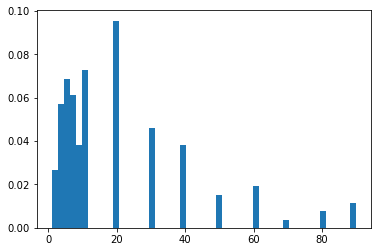

In [420]:
plt.hist(df_temp2['Value'] ,density=True, bins=50)

In [421]:
df_temp2['logValue'] = np.log(df_temp['Value'])

<ipython-input-421-9948fc85a131>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp2['logValue'] = np.log(df_temp['Value'])


(array([0.15117797, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.37794493, 0.        , 0.        ,
        0.        , 0.        , 0.30235595, 0.        , 0.        ,
        0.83147886, 0.        , 0.6047119 , 0.        , 0.75588987,
        0.        , 0.45353392, 0.        , 0.75588987, 0.75588987,
        1.43619075, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.88972467, 0.        ,
        0.        , 0.        , 0.90706784, 0.        , 0.        ,
        0.75588987, 0.        , 0.        , 0.30235595, 0.        ,
        0.37794493, 0.        , 0.07558899, 0.15117797, 0.22676696]),
 array([0.        , 0.08999619, 0.17999239, 0.26998858, 0.35998477,
        0.44998097, 0.53997716, 0.62997335, 0.71996955, 0.80996574,
        0.89996193, 0.98995813, 1.07995432, 1.16995051, 1.25994671,
        1.3499429 , 1.43993909, 1.52993529, 1.61993148, 1.70992767,
        1.79992387, 1.88992006, 1.97991625, 2.

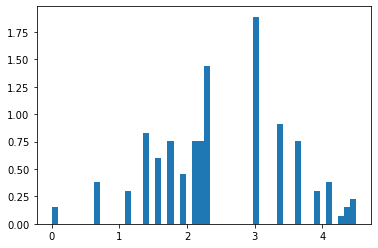

In [422]:
plt.hist(df_temp2['logValue'] ,density=True, bins=50)

In [440]:
lm = smf.ols('logValue ~ Age + Goals+ Asists + SCA + GCA + ProgDistPass + ShootOnTarget +MatchPlayed+ PointPerMatch +TouchPenArea+ SuccDrib', data=df_temp2)
fit1 = lm.fit()
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logValue   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     12.32
Date:                Sat, 02 Jan 2021   Prob (F-statistic):           7.83e-16
Time:                        19:43:38   Log-Likelihood:                -153.81
No. Observations:                 147   AIC:                             331.6
Df Residuals:                     135   BIC:                             367.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.0261      0.761      2.664      0.009       0.522       3.530
Age              -0.0896      0.019     -4.748      0.000      -0.127      -0.052
Goals             0.0458      0.022      2.074      0.040       0.002       0.090
Asists            0.0129      0.043      0.303      0.763      -0.071       0.097
SCA               0.0009      0.006      0.161      0.872      -0.010       0.012
GCA              -0.0057      0.025     -0.229      0.819      -0.055       0.044
ProgDistPass      0.0002      0.000      1.799      0.074   -1.91e-05       0.000
ShootOnTarget    -0.0105      0.012     -0.850      0.397      -0.035       0.014
MatchPlayed       0.0149      0.017      0.856      0.394      -0.020       0.049
PointPerMatch     0.8968      0.173      5.184      0.000       0.555       1.239
TouchPenArea      0.0046      0.002      1.880      0.062      -0.000       0.009
SuccDrib         -0.0025      0.004     -0.695      0.488      -0.010       0.005
==============================================================================
Omnibus:                        0.962   Durbin-Watson:                   2.143
Prob(Omnibus):                  0.618   Jarque-Bera (JB):                1.048
Skew:                           0.183   Prob(JB):                        0.592
Kurtosis:                       2.808   Cond. No.                     2.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [439]:
lm = smf.ols('logValue ~ Age + Goals+ ShootOnTarget +MatchPlayed+ PointPerMatch +TouchPenArea ', data=df_temp2)
fit1 = lm.fit()
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logValue   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     19.19
Date:                Sat, 02 Jan 2021   Prob (F-statistic):           3.06e-16
Time:                        19:43:32   Log-Likelihood:                -160.78
No. Observations:                 147   AIC:                             335.6
Df Residuals:                     140   BIC:                             356.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.6740      0.744      2.251      0.026       0.203       3.145
Age              -0.0794      0.018     -4.345      0.000      -0.115      -0.043
Goals             0.0299      0.022      1.388      0.167      -0.013       0.072
ShootOnTarget    -0.0046      0.012     -0.377      0.707      -0.029       0.019
MatchPlayed       0.0240      0.017      1.404      0.163      -0.010       0.058
PointPerMatch     0.9582      0.168      5.700      0.000       0.626       1.291
TouchPenArea      0.0048      0.002      2.164      0.032       0.000       0.009
==============================================================================
Omnibus:                        1.580   Durbin-Watson:                   2.227
Prob(Omnibus):                  0.454   Jarque-Bera (JB):                1.450
Skew:                           0.243   Prob(JB):                        0.484
Kurtosis:                       2.971   Cond. No.                     1.68e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.68e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [454]:
lm = smf.ols('logValue ~ Min + Goals  + Asists   + GoalAstPer90  + SCA + SCA90 + ShootPass + ShootDrib + GCA + GCA90 + AssistPass + AssistDrib + CompletedPasses + PassCompRatio + TotDistPass + ProgDistPass + Crosses + PenaltyWon + AerialWonRate + ShootOnTarget + ShootPer90 + GoalPerShoot + TacklesWon + TklDribbling + Blocks + SuccPressRatio + MatchPlayed + PointPerMatch + TouchPenArea + SuccDrib + DribLegs ', data=df_temp2)
fit1 = lm.fit()
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logValue   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     4.085
Date:                Sat, 02 Jan 2021   Prob (F-statistic):           1.86e-08
Time:                        20:05:22   Log-Likelihood:                -150.31
No. Observations:                 147   AIC:                             364.6
Df Residuals:                     115   BIC:                             460.3
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -1.3668      1.671     -0.818      0.415      -4.677       1.943
Min                -0.0005      0.000     -1.274      0.205      -0.001       0.000
Goals              -0.0218      0.055     -0.400      0.690      -0.130       0.086
Asists             -0.0592      0.079     -0.747      0.456      -0.216       0.098
GoalAstPer90        0.8428      1.356      0.621      0.536      -1.844       3.530
SCA                -0.0061      0.015     -0.407      0.685      -0.036       0.024
SCA90              -0.0224      0.176     -0.127      0.899      -0.372       0.327
ShootPass           0.0012      0.018      0.064      0.949      -0.035       0.037
ShootDrib           0.0085      0.035      0.247      0.806      -0.060       0.077
GCA                 0.0872      0.089      0.977      0.331      -0.090       0.264
GCA90              -1.7372      1.731     -1.004      0.318      -5.165       1.691
AssistPass         -0.0203      0.065     -0.310      0.757      -0.150       0.109
AssistDrib         -0.0304      0.088     -0.346      0.730      -0.204       0.143
CompletedPasses    -0.0045      0.002     -2.197      0.030      -0.009      -0.000
PassCompRatio       0.0201      0.019      1.064      0.290      -0.017       0.057
TotDistPass         0.0002      0.000      1.980      0.050   -1.21e-07       0.000
ProgDistPass        0.0003      0.000      1.239      0.218      -0.000       0.001
Crosses            -0.0012      0.005     -0.237      0.813      -0.011       0.009
PenaltyWon         -0.1489      0.084     -1.776      0.078      -0.315       0.017
AerialWonRate      -0.0061      0.007     -0.866      0.388      -0.020       0.008
ShootOnTarget       0.0080      0.017      0.459      0.647      -0.027       0.043
ShootPer90         -0.0678      0.176     -0.386      0.700      -0.416       0.280
GoalPerShoot        1.7206      2.401      0.717      0.475      -3.035       6.476
TacklesWon          0.0208      0.015      1.403      0.163      -0.009       0.050
TklDribbling       -0.0396      0.028     -1.425      0.157      -0.095       0.015
Blocks             -0.0006      0.009     -0.059      0.953      -0.019       0.018
SuccPressRatio      0.0122      0.022      0.550      0.583      -0.032       0.056
MatchPlayed         0.0333      0.023      1.473      0.143      -0.011       0.078
PointPerMatch       0.6990      0.263      2.659      0.009       0.178       1.220
TouchPenArea        0.0098      0.004      2.685      0.008       0.003       0.017
SuccDrib            0.0002      0.007      0.030      0.976      -0.014       0.015
DribLegs            0.0330      0.040      0.834      0.406      -0.045       0.112
==============================================================================
Omnibus:                        0.079   Durbin-Watson:          

In [433]:
df_temp3 = df_temp[df_temp['PlayerType']=='Midfielder']

In [456]:
lm = smf.ols('Value ~ Min + Goals  + Asists   + GoalAstPer90  + SCA + SCA90 + ShootPass + ShootDrib + GCA + GCA90 + AssistPass + AssistDrib + CompletedPasses + PassCompRatio + TotDistPass + ProgDistPass + Crosses + PenaltyWon + AerialWonRate + ShootOnTarget + ShootPer90 + GoalPerShoot + TacklesWon + TklDribbling + Blocks + SuccPressRatio + MatchPlayed + PointPerMatch + TouchPenArea + SuccDrib + DribLegs ', data=df_temp3)
fit1 = lm.fit()
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     4.387
Date:                Sat, 02 Jan 2021   Prob (F-statistic):           3.57e-10
Time:                        20:10:53   Log-Likelihood:                -700.29
No. Observations:                 188   AIC:                             1465.
Df Residuals:                     156   BIC:                             1568.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -2.2440     25.181     -0.089      0.929     -51.985      47.497
Min                -0.0039      0.005     -0.851      0.396      -0.013       0.005
Goals              -0.5617      1.017     -0.552      0.582      -2.571       1.448
Asists              0.5689      1.267      0.449      0.654      -1.934       3.072
GoalAstPer90       -5.4904     27.126     -0.202      0.840     -59.072      48.091
SCA                -0.0515      0.180     -0.286      0.775      -0.407       0.304
SCA90              -1.2235      3.887     -0.315      0.753      -8.901       6.454
ShootPass          -0.0732      0.160     -0.459      0.647      -0.388       0.242
ShootDrib           0.2296      0.501      0.458      0.648      -0.761       1.220
GCA                 0.5766      1.556      0.370      0.712      -2.497       3.651
GCA90             -21.6552     31.850     -0.680      0.498     -84.568      41.257
AssistPass          0.4076      0.874      0.467      0.641      -1.318       2.133
AssistDrib         -0.8039      1.691     -0.475      0.635      -4.145       2.537
CompletedPasses    -0.0144      0.015     -0.969      0.334      -0.044       0.015
PassCompRatio      -0.0715      0.283     -0.253      0.801      -0.631       0.487
TotDistPass         0.0010      0.001      1.386      0.168      -0.000       0.002
ProgDistPass        0.0023      0.001      1.643      0.102      -0.000       0.005
Crosses             0.0135      0.067      0.201      0.841      -0.119       0.146
PenaltyWon         -2.2522      1.534     -1.468      0.144      -5.282       0.778
AerialWonRate      -0.0501      0.085     -0.587      0.558      -0.219       0.118
ShootOnTarget      -0.1076      0.307     -0.350      0.727      -0.714       0.499
ShootPer90          2.6526      2.971      0.893      0.373      -3.216       8.521
GoalPerShoot       22.6623     21.421      1.058      0.292     -19.650      64.975
TacklesWon          0.1854      0.118      1.578      0.117      -0.047       0.418
TklDribbling       -0.1519      0.202     -0.752      0.453      -0.551       0.247
Blocks             -0.1959      0.086     -2.273      0.024      -0.366      -0.026
SuccPressRatio     -0.1025      0.284     -0.361      0.719      -0.664       0.459
MatchPlayed         0.1281      0.281      0.456      0.649      -0.427       0.684
PointPerMatch      13.5757      3.148      4.312      0.000       7.357      19.794
TouchPenArea        0.2086      0.053      3.943      0.000       0.104       0.313
SuccDrib            0.0317      0.076      0.415      0.679      -0.119       0.183
DribLegs            0.2815      0.556      0.506      0.613      -0.816       1.379
==============================================================================
Omnibus:                        8.175   Durbin-Watson:          

In [446]:
df_temp3['AsistCre'] = df_temp3['Asists'] **2 + df_temp3['SCA'] ** 2 + df_temp3['AssistPass'] ** 2 
df_temp3['PointPerMatch2'] = df_temp3['PointPerMatch'] ** 2
df_temp3['Def'] = df_temp3.TacklesWon+ df_temp3.TklDribbling **2 +df_temp3.Blocks
df_temp3

<ipython-input-446-d7baf2eb7dcf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp3['AsistCre'] = df_temp3['Asists'] **2 + df_temp3['SCA'] ** 2 + df_temp3['AssistPass'] ** 2
<ipython-input-446-d7baf2eb7dcf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp3['PointPerMatch2'] = df_temp3['PointPerMatch'] ** 2
<ipython-input-446-d7baf2eb7dcf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

,Position,Age,Min,Goals,Goals.1,Asists,Asists.1,GoalAstPer90,90s,SCA,SCA90,ShootPass,ShootDrib,GCA,GCA90,AssistPass,AssistDrib,CompletedPasses,PassCompRatio,TotDistPass,ProgDistPass,Crosses,PenaltyWon,AerialWonRate,ShootOnTarget,ShootPer90,GoalPerShoot,TacklesWon,TklDribbling,Blocks,SuccPressRatio,MatchPlayed,PointPerMatch,TouchPenArea,SuccDrib,DribLegs,PlayerType,PlayerName,Value,Value2,AsistCre,PointPerMatch2,def,Def
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Abdoulaye Doucouré,MF,26.0,3156,4,0.110000,2,0.060000,0.17,35.1,84.0,2.400000,59.0,10.0,6.0,0.170000,4.0,0.0,1302.0,78.5,21933.0,4818.0,27,0.0,50.000000,12,1.770000,0.06,49,16.0,59.0,25.1,37,0.89,98.0,49.0,2.0,Midfielder,Abdoulaye Doucouré,30.0,M,7076.0,0.7921,364.0,364.0
Abdoulaye Touré,MF,25.0,2221,3,0.120000,0,0.000000,0.12,24.7,43.0,1.740000,28.0,5.0,2.0,0.080000,1.0,1.0,1135.0,84.8,21164.0,4192.0,9,0.0,50.000000,8,1.340000,0.03,28,12.0,39.0,29.6,27,1.37,24.0,38.0,1.0,Midfielder,Abdoulaye Touré,7.0,M,1850.0,1.8769,211.0,211.0
Adama Traoré,MF,24.0,3637,5,0.076667,13,0.223333,0.30,40.4,155.0,2.806667,103.0,19.0,19.0,0.293333,14.0,1.0,1030.0,76.7,18072.0,4891.0,161,0.0,40.866667,16,1.003333,0.05,26,12.0,42.0,15.9,54,1.09,128.0,186.0,5.0,Midfielder,Adama Traoré,40.0,M,24390.0,1.1881,212.0,212.0
Albin Ekdal,MF,30.0,2385,0,0.000000,2,0.080000,0.08,26.5,57.0,2.150000,49.0,0.0,7.0,0.260000,4.0,0.0,1012.0,87.2,18005.0,4955.0,5,2.0,58.800000,2,0.640000,0.00,44,19.0,48.0,29.8,32,1.28,27.0,24.0,2.0,Midfielder,Albin Ekdal,4.0,M,3269.0,1.6384,453.0,453.0
Aleix Vidal,MF,29.0,2165,2,0.080000,4,0.170000,0.25,24.1,71.0,2.950000,37.0,3.0,9.0,0.370000,4.0,0.0,611.0,72.1,11886.0,3841.0,57,1.0,32.300000,9,0.910000,0.09,16,9.0,36.0,22.6,29,1.14,45.0,22.0,3.0,Midfielder,Aleix Vidal,8.0,M,5073.0,1.2996,133.0,133.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yangel Herrera,MF,21.0,2368,2,0.080000,3,0.110000,0.19,26.3,50.0,1.900000,33.0,3.0,9.0,0.340000,6.0,1.0,714.0,75.8,13566.0,4100.0,5,0.0,56.600000,4,1.290000,0.06,56,21.0,57.0,26.3,30,1.63,26.0,21.0,1.0,Midfielder,Yangel Herrera,20.0,M,2545.0,2.6569,554.0,554.0
Youri Tielemans,MF,22.0,2828,3,0.100000,6,0.190000,0.29,31.4,95.0,3.020000,80.0,1.0,9.0,0.290000,9.0,0.0,1455.0,80.7,27253.0,6909.0,45,0.0,50.900000,13,1.720000,0.06,40,15.0,51.0,27.5,37,1.59,59.0,30.0,2.0,Midfielder,Youri Tielemans,40.0,M,9142.0,2.5281,316.0,316.0
Álex Berenguer,MF,24.0,1823,6,0.300000,2,0.100000,0.39,20.3,77.0,3.800000,41.0,15.0,9.0,0.440000,4.0,4.0,587.0,74.2,9679.0,2780.0,38,0.0,31.700000,13,1.970000,0.15,12,9.0,34.0,22.4,29,1.10,81.0,71.0,3.0,Midfielder,Álex Berenguer,10.0,M,5949.0,1.2100,127.0,127.0


In [449]:
lm = smf.ols('Value ~ Age + Goals+ Asists + ProgDistPass + PointPerMatch + SuccDrib + AsistCre+ PointPerMatch2+Def', data=df_temp3)
fit1 = lm.fit()
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     13.51
Date:                Sat, 02 Jan 2021   Prob (F-statistic):           2.10e-16
Time:                        19:47:33   Log-Likelihood:                -710.26
No. Observations:                 188   AIC:                             1441.
Df Residuals:                     178   BIC:                             1473.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         32.1537     11.409      2.818      0.005       9.640      54.667
Age               -0.7216      0.231     -3.128      0.002      -1.177      -0.266
Goals             -0.0462      0.309     -0.149      0.882      -0.657       0.565
Asists             0.0854      0.424      0.201      0.841      -0.751       0.922
ProgDistPass       0.0011      0.001      2.252      0.026       0.000       0.002
PointPerMatch    -24.7920     12.288     -2.018      0.045     -49.042      -0.542
SuccDrib           0.1129      0.041      2.757      0.006       0.032       0.194
AsistCre           0.0003      0.000      1.120      0.264      -0.000       0.001
PointPerMatch2    12.9925      3.909      3.324      0.001       5.279      20.706
Def               -0.0015      0.003     -0.565      0.573      -0.007       0.004
==============================================================================
Omnibus:                       11.774   Durbin-Watson:                   2.204
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.297
Skew:                           0.617   Prob(JB):                      0.00214
Kurtosis:                       3.217   Cond. No.                     1.94e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.94e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""